# Examen de cinturón AML – Opción A

## Descripción del examen:

En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando K-means o PCA, y luego modelarás el conjunto de datos utilizando un Perceptrón Multicapa (MLP). El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

## Dataset:
El dataset utilizado para este examen es el «Customer Personality Analysis» disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.
Enlace al dataset: https://www.kaggle.com/imakash3011/customer-personality-analysis 

## Instrucciones:

### 1. Exploración y preprocesamiento de datos:

* Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
* Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

### 2. Análisis no supervisado:

* Selecciona un enfoque de análisis no supervisado: K-means o PCA.
    * K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
    * PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

### 3. Modelado con MLP:

* Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.
* Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
* Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

### 4. Evaluación del modelo:

* Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.
* Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

### 5. Discusión y análisis:

* Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?
* Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

### 6. Entrega final:

* Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.


# Resolución

## Importación de librerías necesarias y configuración.

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    silhouette_score,
    mean_absolute_error,
    root_mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping, History
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

from utils.classification_utils import graficar_matriz_confusion
from utils.eda_utils import limpiar_cadena
from utils.eda_utils import (
    graficar_barras_conteo,
    graficar_barras_conteo_contra_columna,
    graficar_boxplots,
    graficar_histogramas,
    graficar_mapa_correlacion,
    obtener_estadisticas_descriptivas_df_es,
    obtener_estadisticas_datos_nulos,
    obtener_datos_outliers_df,
)
from utils.git_utils import get_repo_file_path
from utils.kaggle_utils import descargar_dataset_kaggle

# Seteamos la semilla en 1 para alcanzar reproducibilidad para el modelo.
tf.keras.utils.set_random_seed(1)

2024-12-22 02:14:14.360514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734833654.381505  436869 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734833654.387938  436869 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 1. Exploración y preprocesamiento de datos:

### Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.

#### Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.


Notar que esta técnica de carga requiere generar el archivo kaggle.json que posee las claves de acceso a kaggle y agregarlo en el root del repositorio.

In [2]:
# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/imakash3011/customer-personality-analysis",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/customer-personality-analysis" (use force=True to force download)


In [3]:
camino_ds = "../data/customer-personality-analysis/marketing_campaign.csv"
df = pd.read_csv(camino_ds, delimiter="\t")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Notamos que en este dataset existen en total 2240 filas y 28 características. Se encuentra también una variable potencialmente de tipo fecha, que debe ser analizada.

#### Conversión de columnas booleanas.

In [4]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no", "N"]:
        return False

    if x in [1, 1.0, "true", "yes", "si", "Y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'AcceptedCmp3': [0 1]
La columna 'AcceptedCmp3' es booleana. Será convertida.
Valores de columna 'AcceptedCmp4': [0 1]
La columna 'AcceptedCmp4' es booleana. Será convertida.
Valores de columna 'AcceptedCmp5': [0 1]
La columna 'AcceptedCmp5' es booleana. Será convertida.
Valores de columna 'AcceptedCmp1': [0 1]
La columna 'AcceptedCmp1' es booleana. Será convertida.
Valores de columna 'AcceptedCmp2': [0 1]
La columna 'AcceptedCmp2' es booleana. Será convertida.
Valores de columna 'Complain': [0 1]
La columna 'Complain' es booleana. Será convertida.
Valores de columna 'Response': [1 0]
La columna 'Response' es booleana. Será convertida.
Columnas convertidas a booleanas: ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


Se detectaron varias columnas booleanas en el dataset, que poseen valores 0 y 1. Estas columnas fueron convertidas. Notar además, que la técnica permite ajustar el código en caso de que se detecten nuevos tipos de valores booleanos.

#### Conversión de columnas de tipo fecha.

In [5]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

Efectivamente, esta columna es una fecha. Procedemos a convertirla a su tipo correcto.

In [6]:
def _convertir_fecha(x):
    if pd.isna(x) or pd.isnull(x):
        return x
    try:
        return datetime.strptime(x, "%d-%m-%Y")
    except Exception:
        print(f"Fallo para valor: {x}")
        return x

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"].apply(_convertir_fecha), utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   ID                   2240 non-null   int64              
 1   Year_Birth           2240 non-null   int64              
 2   Education            2240 non-null   object             
 3   Marital_Status       2240 non-null   object             
 4   Income               2216 non-null   float64            
 5   Kidhome              2240 non-null   int64              
 6   Teenhome             2240 non-null   int64              
 7   Dt_Customer          2240 non-null   datetime64[ns, UTC]
 8   Recency              2240 non-null   int64              
 9   MntWines             2240 non-null   int64              
 10  MntFruits            2240 non-null   int64              
 11  MntMeatProducts      2240 non-null   int64              
 12  MntFishProducts     

La columna de tipo fecha fue convertida correctamente.

#### Conversión de columnas categóricas.

In [7]:
columnas_potencialmente_categoricas = df.select_dtypes(include=["object", "string"]).columns.tolist()

columnas_potencialmente_categoricas

['Education', 'Marital_Status']

In [8]:
for columna in columnas_potencialmente_categoricas:
    df[columna] = df[columna].apply(limpiar_cadena)

Verificamos y convertimos si es necesario.

In [9]:
# Se elige el 5% como valor para empezar a considerar una columna como categórica.
# Si se supera esta cantidad la columna se dejará como cadena.
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []
columnas_convertidas_a_string = []

for columna in columnas_potencialmente_categoricas:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (porcentaje_max_columnas_categoricas * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}' a categórica, se opta por dejarla como string")
        df[columna] = df[columna].astype("string")
        columnas_convertidas_a_string

    del valores_unicos

print("\n")
print(f"Cant. de columnas analizadas: {len(columnas_potencialmente_categoricas)}")
print(f"Cant. de columnas convertidas a category: {len(columnas_convertidas_a_categoricas)}")
print(f"Cant. de columnas convertidas a string: {len(columnas_convertidas_a_string)}")
print(f"Columnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")
print(f"Columnas convertidas a string: {str(columnas_convertidas_a_string)}")

Cant. únicos para columna 'Education': 5
Valores únicos columna 'Education': ['graduation', 'phd', 'master', 'basic', '2n cycle']
Se procede a convertir la columna 'Education' a categórica
Cant. únicos para columna 'Marital_Status': 8
Valores únicos columna 'Marital_Status': ['single', 'together', 'married', 'divorced', 'widow', 'alone', 'absurd', 'yolo']
Se procede a convertir la columna 'Marital_Status' a categórica


Cant. de columnas analizadas: 2
Cant. de columnas convertidas a category: 2
Cant. de columnas convertidas a string: 0
Columnas convertidas a categóricas: ['Education', 'Marital_Status']
Columnas convertidas a string: []


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   ID                   2240 non-null   int64              
 1   Year_Birth           2240 non-null   int64              
 2   Education            2240 non-null   category           
 3   Marital_Status       2240 non-null   category           
 4   Income               2216 non-null   float64            
 5   Kidhome              2240 non-null   int64              
 6   Teenhome             2240 non-null   int64              
 7   Dt_Customer          2240 non-null   datetime64[ns, UTC]
 8   Recency              2240 non-null   int64              
 9   MntWines             2240 non-null   int64              
 10  MntFruits            2240 non-null   int64              
 11  MntMeatProducts      2240 non-null   int64              
 12  MntFishProducts     

Se encontraron dos columnas categóricas. No se encontró ninguna columna de tipo cadena. Notar además, que el código se puede ajustar de acuerdo a lo que se imprime en caso de que se detecten irregularidades.

#### Verificación de datos de tipo numéricos.

In [11]:
columnas_numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
columnas_numericas

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue']

In [12]:
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

for columna in columnas_numericas:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (porcentaje_max_columnas_categoricas * cant_filas_df):
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
    del valores_unicos


Cant. únicos para columna 'ID': 2240
Cant. únicos para columna 'Year_Birth': 59
Valores únicos columna 'Year_Birth': [1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]
Cant. únicos para columna 'Income': 1974
Cant. únicos para columna 'Kidhome': 3
Valores únicos columna 'Kidhome': [0, 1, 2]
Cant. únicos para columna 'Teenhome': 3
Valores únicos columna 'Teenhome': [0, 1, 2]
Cant. únicos para columna 'Recency': 100
Valores únicos columna 'Recency': [58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43,

No se puede identificar ninguna columna numérica potencialmente categórica. Sí se puede notar que existen dos variables para denotar la cantidad de hijos, kidhome, y teenhome. Estas características podrían potencialmente ser unificadas en una sola variable.

#### Verificación de datos nulos.

In [13]:
estadisticas_datos_nulos = obtener_estadisticas_datos_nulos(df)
estadisticas_datos_nulos

,datos sin NAs en q,Na en q,Na en %
Income,2216,24,1.07
ID,2240,0,0.00
NumDealsPurchases,2240,0,0.00
Z_Revenue,2240,0,0.00
Z_CostContact,2240,0,0.00
Complain,2240,0,0.00
AcceptedCmp2,2240,0,0.00
AcceptedCmp1,2240,0,0.00
AcceptedCmp5,2240,0,0.00
AcceptedCmp4,2240,0,0.00


Podemos notar que existe solo una columna con datos nulos, Income.

In [14]:
obtener_estadisticas_descriptivas_df_es(df[["Income"]]).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Income,2216.0,1730.0,666666.0,52247.251354,25173.076661,51381.5,0.481807


De las estadísticas descriptivas para esta columna, podemos notar que el coeficiente de variación es del 48%, superior al 30%, por lo cual, el promedio en esta columna no es representativo, y debe imputarce con otras técnicas.


Se evalúa la utilización de un RandomForestRegressor como técnica de predicción para imputación de estos valores. Notar que en esta sección solamente se evalúa el performance de la imputación, con el objetivo de determinar qué tan bueno es el predictor, y en la sección del modelado se entrenaría este imputador de vuelta con los datos de train y test, evitando así que datos de test afecten el entrenamiento del modelo. Para la predicción de income, se eligen para la predicción solamente columnas que nos pueden indicar el nivel de ingresos de la persona:

Columnas de Gastos:
* MntWines
* MntMeatProducts
* MntFishProducts
* MntSweetProducts
* MntGoldProducts

Datos personales
* Education
* Year_Birth

Datos de Ofertas:
* NumDealsPurchases: Este parámetro nos indica potencialmente si el cliente es más propenso a tomar descuentos, por lo que también podría ser útil en la predicción.

In [15]:

preprocessor_imputer = ColumnTransformer(transformers=[
    ("ordinal", OrdinalEncoder(categories=[['basic', '2n cycle', 'graduation', 'master', 'phd']]), ["Education",]),
], remainder="passthrough")

imputer = Pipeline(steps=[
    ("preprocessor", preprocessor_imputer),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42)),
])

df_income_no_na = df[df["Income"].notna()]

X_imputer = df_income_no_na[[
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts", 
    "MntSweetProducts", 
    "MntGoldProds",
    "Education",
    "Year_Birth",
    "NumDealsPurchases",
]]
y_imputer = df_income_no_na["Income"]

X_imputer_train, X_imputer_test, y_imputer_train, y_imputer_test = train_test_split(
    X_imputer,
    y_imputer,
    test_size=0.3,
    random_state=42,
)

In [16]:
imputer.fit(X_imputer_train, y_imputer_train)

/home/diego/.virtualenvs/venv/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['basic',
                                                                              '2n '
                                                                              'cycle',
                                                                              'graduation',
                                                                              'master',
                                                                              'phd']]),
                                                  ['Education'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [17]:
# Realizar predicciones
y_imputer_pred = imputer.predict(X_imputer_test)

# Evaluar el modelo
rmse = root_mean_squared_error(y_imputer_test, y_imputer_pred)
mse = rmse ** 2
r2 = r2_score(y_imputer_test, y_imputer_pred)
mae = mean_absolute_error(y_imputer_test, y_imputer_pred)

print(f'Raíz Error Cuadrático Medio (RMSE): {rmse}')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'R-cuadrado (R2): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

Raíz Error Cuadrático Medio (RMSE): 11668.994171437202
Error Cuadrático Medio (MSE): 136165424.9730354
R-cuadrado (R2): 0.7002549867300025
Error Absoluto Medio (MAE): 6997.664263157893


De los resultados obtenidos, no parece ser que se obtenga un performance muy alto en el modelo predictivo seleccionado.

De igual manera, se opta por mantener este modelo en caso de requerir imputar estos datos en producción. No se utilizará en la fase de entrenamiento, ya que la cantidad de nulos en income es muy bajo, y eliminarlos no afectaría los resultados del entrenamiento.

Solo a modo de verificación, comprobamos que la imputación en Income no introduzca sesgos en la columna.

In [18]:
df_imputed = df.copy()

In [19]:
X_income_nan = df_imputed.loc[df_imputed["Income"].isna(),:][[
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts", 
    "MntSweetProducts", 
    "MntGoldProds",
    "Education",
    "Year_Birth",
    "NumDealsPurchases",
]]

df_imputed.loc[df_imputed["Income"].isna(), "Income"] = imputer.predict(X_income_nan)

In [20]:
obtener_estadisticas_datos_nulos(df_imputed)

,datos sin NAs en q,Na en q,Na en %
ID,2240,0,0.0
NumDealsPurchases,2240,0,0.0
Z_Revenue,2240,0,0.0
Z_CostContact,2240,0,0.0
Complain,2240,0,0.0
AcceptedCmp2,2240,0,0.0
AcceptedCmp1,2240,0,0.0
AcceptedCmp5,2240,0,0.0
AcceptedCmp4,2240,0,0.0
AcceptedCmp3,2240,0,0.0


/tmp/ipykernel_436869/3925216641.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Income'], label='Original', shade=True)
/tmp/ipykernel_436869/3925216641.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_imputed['Income'], label='Imputado', shade=True)


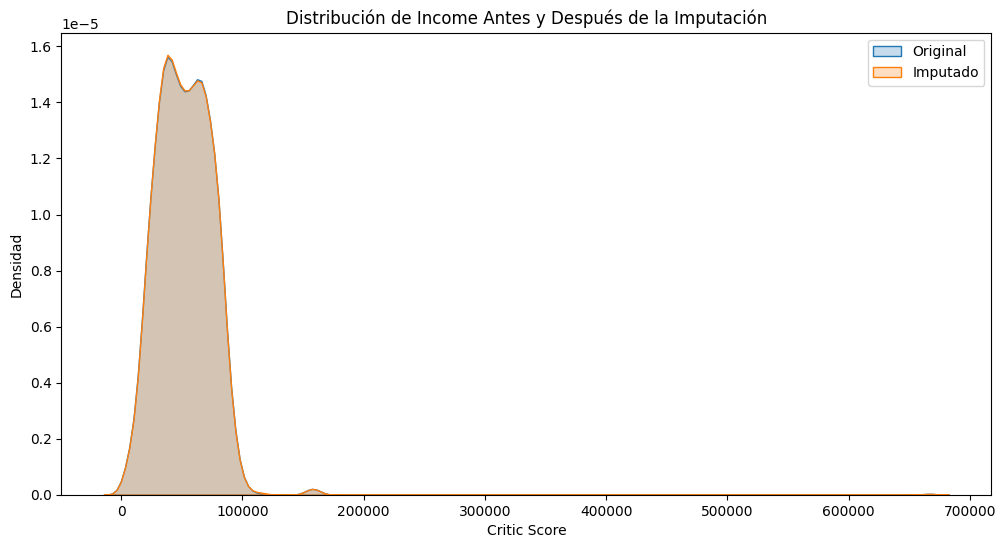

In [21]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Income'], label='Original', shade=True)
sns.kdeplot(df_imputed['Income'], label='Imputado', shade=True)
plt.title('Distribución de Income Antes y Después de la Imputación')
plt.xlabel('Critic Score')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Podemos notar que no existen sesgos representativos al imputar Income con el modelo predictivo. De igual manera, se opta por no usar estas imputaciones para los modelos de predicción, y solo se mantiene el modelo entrenado para usarlo al encontrar datos nulos en la columna Income en producción.

Procedemos a eliminar las filas que contienen datos nulos en Income para el entrenamiento.

In [22]:
df.dropna(subset=["Income",], inplace=True)

In [23]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
ID,2216,0,0.0
NumDealsPurchases,2216,0,0.0
Z_Revenue,2216,0,0.0
Z_CostContact,2216,0,0.0
Complain,2216,0,0.0
AcceptedCmp2,2216,0,0.0
AcceptedCmp1,2216,0,0.0
AcceptedCmp5,2216,0,0.0
AcceptedCmp4,2216,0,0.0
AcceptedCmp3,2216,0,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   ID                   2216 non-null   int64              
 1   Year_Birth           2216 non-null   int64              
 2   Education            2216 non-null   category           
 3   Marital_Status       2216 non-null   category           
 4   Income               2216 non-null   float64            
 5   Kidhome              2216 non-null   int64              
 6   Teenhome             2216 non-null   int64              
 7   Dt_Customer          2216 non-null   datetime64[ns, UTC]
 8   Recency              2216 non-null   int64              
 9   MntWines             2216 non-null   int64              
 10  MntFruits            2216 non-null   int64              
 11  MntMeatProducts      2216 non-null   int64              
 12  MntFishProducts      2216

In [25]:
df[df["Income"] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


#### Estadísticas descriptivas.

In [26]:
obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
ID,2216.0,0.0,11191.0,5588.353339,3249.376275,5458.5,0.581455
Year_Birth,2216.0,1893.0,1996.0,1968.820397,11.985554,1970.0,0.006088
Income,2216.0,1730.0,666666.0,52247.251354,25173.076661,51381.5,0.481807
Kidhome,2216.0,0.0,2.0,0.441787,0.536896,0.0,1.215283
Teenhome,2216.0,0.0,2.0,0.505415,0.544181,0.0,1.076701
Recency,2216.0,0.0,99.0,49.012635,28.948352,49.0,0.590630
MntWines,2216.0,0.0,1493.0,305.091606,337.327920,174.5,1.105661
MntFruits,2216.0,0.0,199.0,26.356047,39.793917,8.0,1.509859
MntMeatProducts,2216.0,0.0,1725.0,166.995939,224.283273,68.0,1.343046
MntFishProducts,2216.0,0.0,259.0,37.637635,54.752082,12.0,1.454716


In [27]:
df["ID"].unique().shape

(2216,)

De las estadísticas descriptivas numéricas podemos determinar:

* La columna ID es un identificador de cliente único, que no necesariamente es un valor realmente importante al momento de realizar predicciones.
* Year_Birth incluye un mínimo de 1893. Es improbable se haga seguimiento de estos clientes hace más de un siglo, por lo que se interpretan estos datos como errores.
* La columna income tiene un máximo 666.666 que potencialmente es un valor incorrecto. Se verificará con gráfico de boxplots para determinar si es un outlier incorrecto o no. Se visualiza también un mínimo de 1730, que si bien es bajo, es posible teniendo en cuenta que hay personas que o no cuentan con ingresos o sus ingresos son bajos, como estudiantes.
* Las columnas Kidhome y teenhome no parecen tener datos inusuales, siendo el máximo para ambas columnas 2.
* Recency parece estar en rangos normales, ya que indica la cantidad en días desde la última compra del cliente.
* Las columnas de cantidades de compra y montos de compra no parece tener un rango incorrecto, se verificará luego en el EDA con gráficos de tipo boxplots.
* Tanto Z_CostContact y Z_Revenue poseen una desviación estándar de 0, lo que indica que todos los valores encontrados son los mismos. Esto no nos será util al momento de crear modelos predictivos, por lo que se opta por eliminar estas columnas.

In [28]:
df.drop(columns=["Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

Verificamos el boxplot de income para identificar outliers incorrectos:

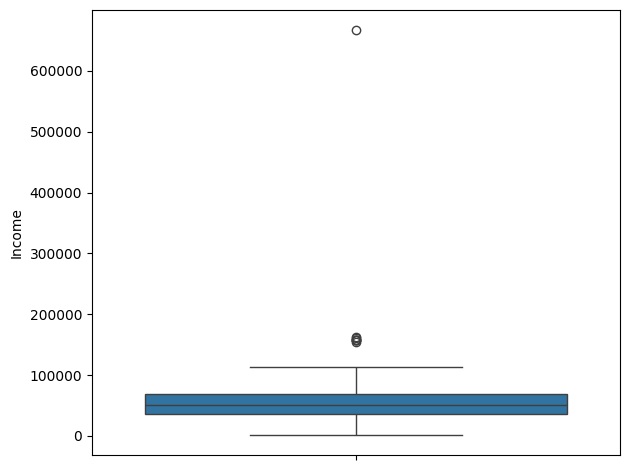

In [29]:
sns.boxplot(df["Income"])
plt.tight_layout()
plt.show()

Del boxplot, podemos notar que efectivamente este outlier 666.666 está muy fuera de rango. Si bien, existe la posibilidad de que una persona tenga ingresos muy altos, este nro es bastante inusual ya que por lo general los clientes al reportar su rango salarial mencionarían un valor redondo en vez de dar el monto exacto, y esto parece mas bien un caso simplemente de error de tipeo. Adicionalmente, al ser un sólo registro, se opta por eliminar este valor, ya que no afectaría al entrenamiento.

In [30]:
df.drop(index=df[df["Income"] > 600_000].index, inplace=True)

Verificamos el boxplot de Year_Birth.

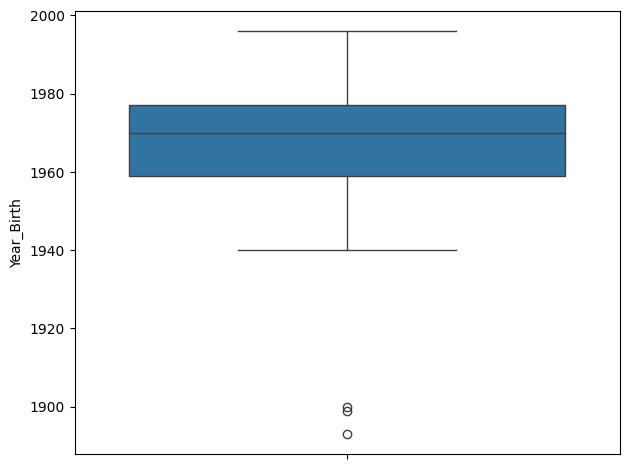

In [31]:
sns.boxplot(df["Year_Birth"])
plt.tight_layout()
plt.show()

Efectivamente, es poco probable que estos datos sean correctos. También, la cant de registros es baja, por lo que se opta por eliminar estas filas.

In [32]:
df.drop(index=df[df["Year_Birth"] < 1930].index, inplace=True)

In [33]:
obtener_estadisticas_descriptivas_df_es(df).T

,Cantidad,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
ID,2212.0,0.0,11191.0,5585.160940,3247.523735,5454.5,0.581456
Year_Birth,2212.0,1940.0,1996.0,1968.913653,11.701599,1970.0,0.005943
Income,2212.0,1730.0,162397.0,51958.810579,21527.278844,51371.0,0.414314
Kidhome,2212.0,0.0,2.0,0.441682,0.536955,0.0,1.215706
Teenhome,2212.0,0.0,2.0,0.505877,0.544253,0.0,1.075861
Recency,2212.0,0.0,99.0,49.019439,28.943121,49.0,0.590442
MntWines,2212.0,0.0,1493.0,305.287523,337.322940,175.5,1.104935
MntFruits,2212.0,0.0,199.0,26.329566,39.744052,8.0,1.509484
MntMeatProducts,2212.0,0.0,1725.0,167.029837,224.254493,68.0,1.342601
MntFishProducts,2212.0,0.0,259.0,37.648734,54.772033,12.0,1.454817


Una vez preprocesados los datos, notamos:

* El rango de edad va ahora desde 1940, lo que da una edad máxima de 84 años en el 2024, siendo dicha edad aún posible.
* El límite superiro de Income paso a ser 162.397, más probable que el limite anterior de 666.666.

In [34]:
df.describe(include='category').T

,count,unique,top,freq
Education,2212,5,graduation,1115
Marital_Status,2212,8,married,857


De estos datos podemos notar:

* La columna education tiene una moda de graduation, indicando que la mayoría de los clientes posee al menos un título universitario.
* La columna Marital_Status nos indica que la mayoría de los clientes en este dataset están casados.

In [35]:
df["Marital_Status"].value_counts()

Marital_Status
married     857
together    571
single      470
divorced    231
widow        76
alone         3
absurd        2
yolo          2
Name: count, dtype: int64

Podemos notar valroes atípicos en Marital_Status con absurd y yolo, que no indican el estado de casado o no. En este caso, al ser las cantidades muy bajas, se opta por eliminar estas filas, para que no influyan en el entrenamiento. En modelos de producción, estos datos deben ser reemplazados o imputados con otro valor, para que el modelo pueda funcionar. Este paso no se realizará en este análisis, pero debe tenerse en cuenta.

En el caso de status = "alone", se combinarán en la categoría single ya que indican la misma cosa.

In [36]:
df.drop(index=df[(df["Marital_Status"] == "absurd") | (df["Marital_Status"] == "yolo")].index, inplace=True)
df.loc[df["Marital_Status"] == "alone", "Marital_Status"] = "single"
df["Marital_Status"] = df["Marital_Status"].astype("string").astype("category")

In [37]:
df["Marital_Status"].value_counts()

Marital_Status
married     857
together    571
single      473
divorced    231
widow        76
Name: count, dtype: int64

#### Análisis de datos outliers.

In [38]:
obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo,Q1,Q3,IQR,Mínimo valor encontrado,Máximo valor encontrado
ID,0.0,0.000000,-5590.875,16824.125,2814.75,8418.50,5603.75,0.0,11191.0
Year_Birth,0.0,0.000000,1932.000,2004.000,1959.00,1977.00,18.00,1940.0,1996.0
Income,7.0,0.317029,-14740.500,118423.500,35196.00,68487.00,33291.00,1730.0,162397.0
Kidhome,0.0,0.000000,-1.500,2.500,0.00,1.00,1.00,0.0,2.0
Teenhome,0.0,0.000000,-1.500,2.500,0.00,1.00,1.00,0.0,2.0
Recency,0.0,0.000000,-51.000,149.000,24.00,74.00,50.00,0.0,99.0
MntWines,35.0,1.585145,-698.250,1227.750,24.00,505.50,481.50,0.0,1493.0
MntFruits,244.0,11.050725,-45.125,79.875,1.75,33.00,31.25,0.0,199.0
MntMeatProducts,173.0,7.835145,-308.375,556.625,16.00,232.25,216.25,0.0,1725.0
MntFishProducts,220.0,9.963768,-67.500,120.500,3.00,50.00,47.00,0.0,259.0


De los datos outlieres, podemos notar que existe un gran porcentaje de outliers en las sgtes. columnas:

* MntWines
* MntFruits
* MntMeatOridycts
* MntSweetProducts
* MntGoldProducts

Esto nos indica que para el modelado, es importante seleccionar una técnica de escalamiento que considere estos outliers.

#### Verificación de datos duplicados.

Eliminamos la columna ID para identificar duplicados que pudieran afectar el entrenamiento de modelos predictivos. Si bien cada cliente es único en el dataset, el hecho de que existan columnas duplicadas en el dataset puede causar sesgos en el entrenamiento.

In [39]:
df.drop(columns="ID", axis=1, inplace=True)

In [40]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 183


Se encontraron duplicados, por lo que se procede a eliminar estos datos para evitar sesgos en los modelos predictivos.

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Year_Birth           2025 non-null   int64              
 1   Education            2025 non-null   category           
 2   Marital_Status       2025 non-null   category           
 3   Income               2025 non-null   float64            
 4   Kidhome              2025 non-null   int64              
 5   Teenhome             2025 non-null   int64              
 6   Dt_Customer          2025 non-null   datetime64[ns, UTC]
 7   Recency              2025 non-null   int64              
 8   MntWines             2025 non-null   int64              
 9   MntFruits            2025 non-null   int64              
 10  MntMeatProducts      2025 non-null   int64              
 11  MntFishProducts      2025 non-null   int64              
 12  MntSweetProducts     2025

#### Feature Engineering

Se crearán las siguientes nuevas columnas columnas:

* Columnas de Gastos totales.
* Columnas de cantidades de compras en diferentes medios.
* Columnas de cant. de hijos.

Esto se hace con el objetivo de usar estos features en la sección de aprendizaje no supervisado.

In [44]:
df["MntSpent"] = df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df["NumPurchases"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
df["NumChildren"] = df["Teenhome"] + df["Kidhome"]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Year_Birth           2025 non-null   int64              
 1   Education            2025 non-null   category           
 2   Marital_Status       2025 non-null   category           
 3   Income               2025 non-null   float64            
 4   Kidhome              2025 non-null   int64              
 5   Teenhome             2025 non-null   int64              
 6   Dt_Customer          2025 non-null   datetime64[ns, UTC]
 7   Recency              2025 non-null   int64              
 8   MntWines             2025 non-null   int64              
 9   MntFruits            2025 non-null   int64              
 10  MntMeatProducts      2025 non-null   int64              
 11  MntFishProducts      2025 non-null   int64              
 12  MntSweetProducts     2025

#### EDA

##### Histogramas

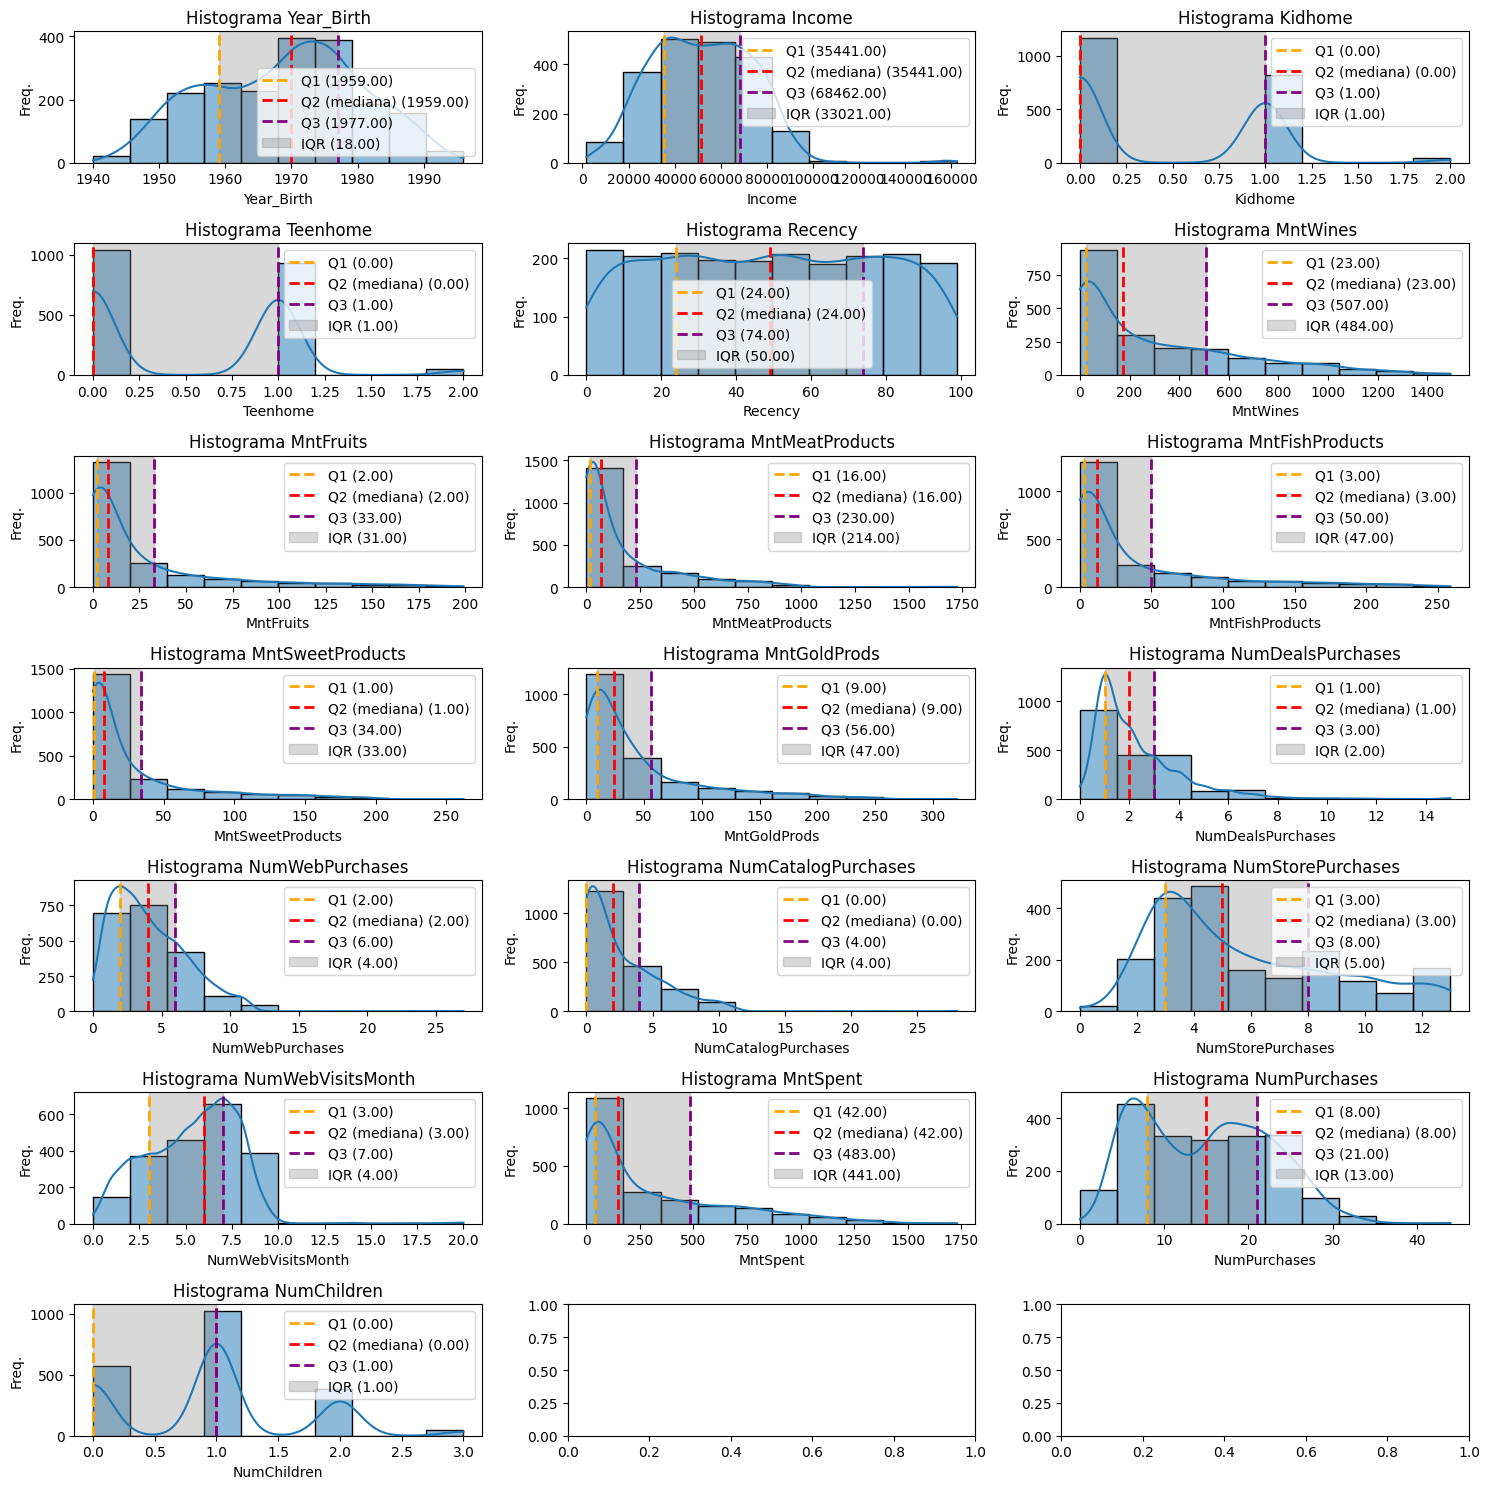

In [46]:
columnas_numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

graficar_histogramas(
    df,
    columnas_numericas,
    nro_columnas=3,
    bins=10,
    kde=True,
    figsize=(15, 15),
    savefig_path="../imgs/histogramas.png",
)

De los histogramas podemos destacar:

* Year_Birth: La mayoría de los clientes en el dataset nacieron entre 1940 y 2000, sugiriendo que tienen como mínimo la edad de 24 años, y un máximo de 84 años a fecha de 2024.
* Income: los datos están mas concentrados entre 30.000-40.000.
* Las columnas de hijos poseen distribuciones normales, siendo 2 hijos la menor cantidad en ambos casos.
* Recency parece tener una distribución muy equitativa.
* Las columnas de montos de gasto (MntWines, MntFruits, etc) muestran una distribución muy concentrada en los precios mas económicos, reduciéndose de a poco a medida que incrementa el precio. Estos precios más altos pueden interpretarse como outliers, y se verificarán luego con los boxplots.
* En la columna NumDealsPurchases, podemos notar que la mayoría de los clientes toman hastas 4 ofertas como máximo, siendo mas raro que tomen más.
* En la columna NumWebPurchases, notamos que hay un rango un poco más distribuído hasta approx. 8 compras online.
* En la columna NumCatalogPurchases, notamos que la mayoría de clientes realizan a lo sumo hasta 5 compras del catálogo
* En la columna NumStorePurchases, notamos que las compras están mejor distribuidas en comparación a NumWebPurchases y NumCatalogPurchases, visualizando que la mayoría de clientes compran en el rango de 3 a 5 compras approx.
* La columna NumWebVisitsMonrth indica que la mayoría de clientes visita a lo sumo hasta 10 veces el sitio web, verificándose también potenciales outliers superiores.
* La columna NumChildren, agregada de Teenhome y Kidhome, indica que existen clientes con familias de hasta 3 personas.
* La columna MntSpent, agregada de todos los gastos, mantiene la distribución de sus variables originales.
* La columna NumPurchases, agregada de las cantidades de compra, muestra una distribución más equitativa cuando la comparamos con sus columnas originales.

##### Boxplots

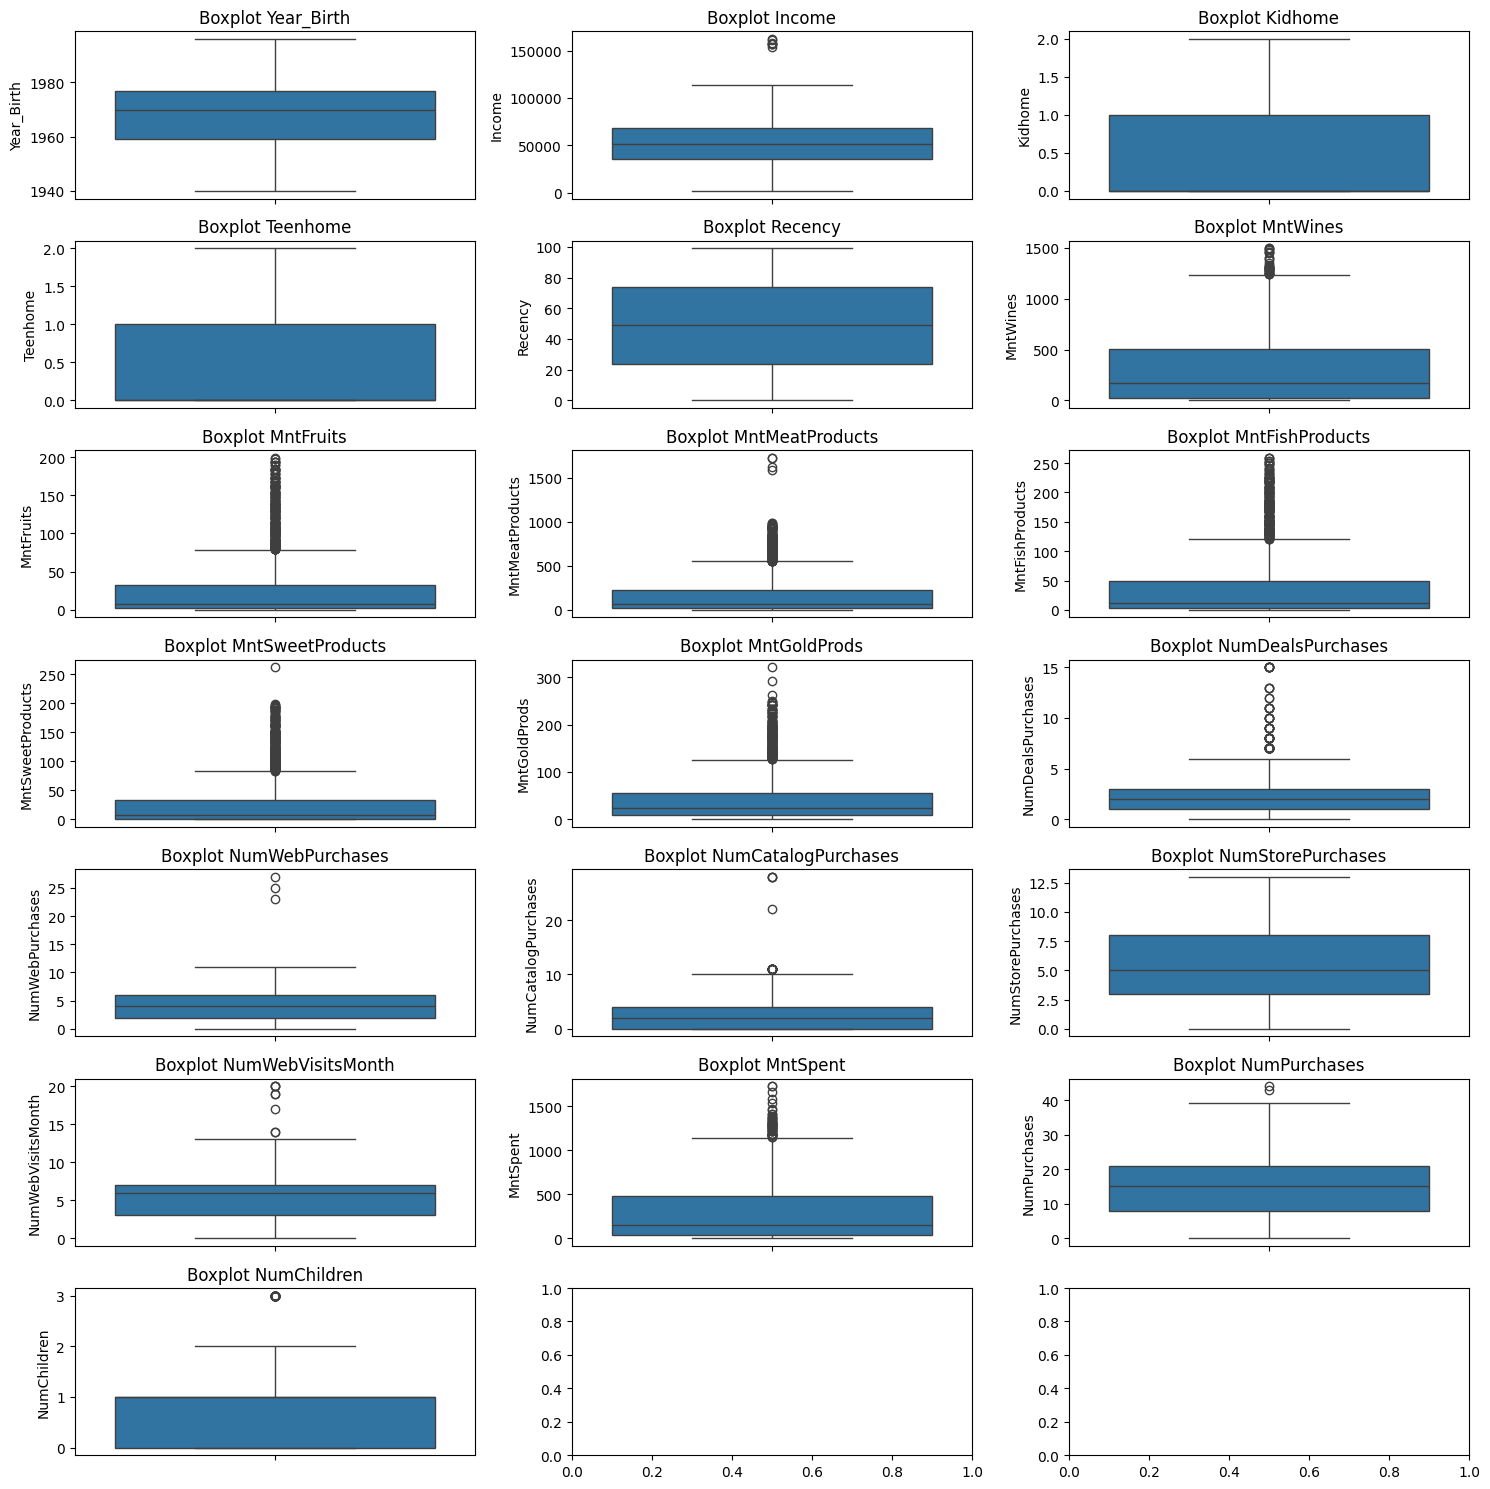

In [47]:
graficar_boxplots(
    df,
    columnas_numericas,
    nro_columnas=3,
    figsize=(15, 15),
    savefig_path="../imgs/boxplots.png",
)

De los boxplots podemos destacar:

* No se encuentran outliers en la columna Year_Birth. Esto es importante ya que nos indica que la distribución de edades es correcta en el dataset.
* En las columnas de monto gastado, se visualiza una gran cantidad de outliers.
* También se pueden visualizar outliers, aunque en menor medida, en las columnas NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumWebVisitsMonth.
* Las columnas Kidhome y Teenhome presentan una mediana (Q2) no centrada, indicando que hay una mayor cantidad de clientes con menor cant. de hijos con respecto al máximo de 2.
* También se vizualiza en los datos de montos gastados que la mediana no está centrada

Estas visualizaciones refuerzan la necesida de implementar técnicas de escalamiento robustas ante outliers, como el RobustScaler de Scikit Learn. Esta técnica de escalamiento se utilizará al momento de entrenar los modelos, usando pipelines, en vez de escalar las características aquí. Se opta por escalar en la sección de modelado ya que el escalamiento solo se calculará con datos de entrenamiento y no con datos de test, evitando sesgos que provengan en los datos de prueba.

##### Gráficos de Barra

/ds_bootcamp/coding-dojo-ds-ml-bootcamp/advanced_machine_learning/examenes/examen_certificacion_intento_2_customer_personality_analysis/notebooks/utils/eda_utils.py:315: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby(columna)["counts"].count().reset_index()
/ds_bootcamp/coding-dojo-ds-ml-bootcamp/advanced_machine_learning/examenes/examen_certificacion_intento_2_customer_personality_analysis/notebooks/utils/eda_utils.py:315: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby(columna)["counts"].count().reset_index()


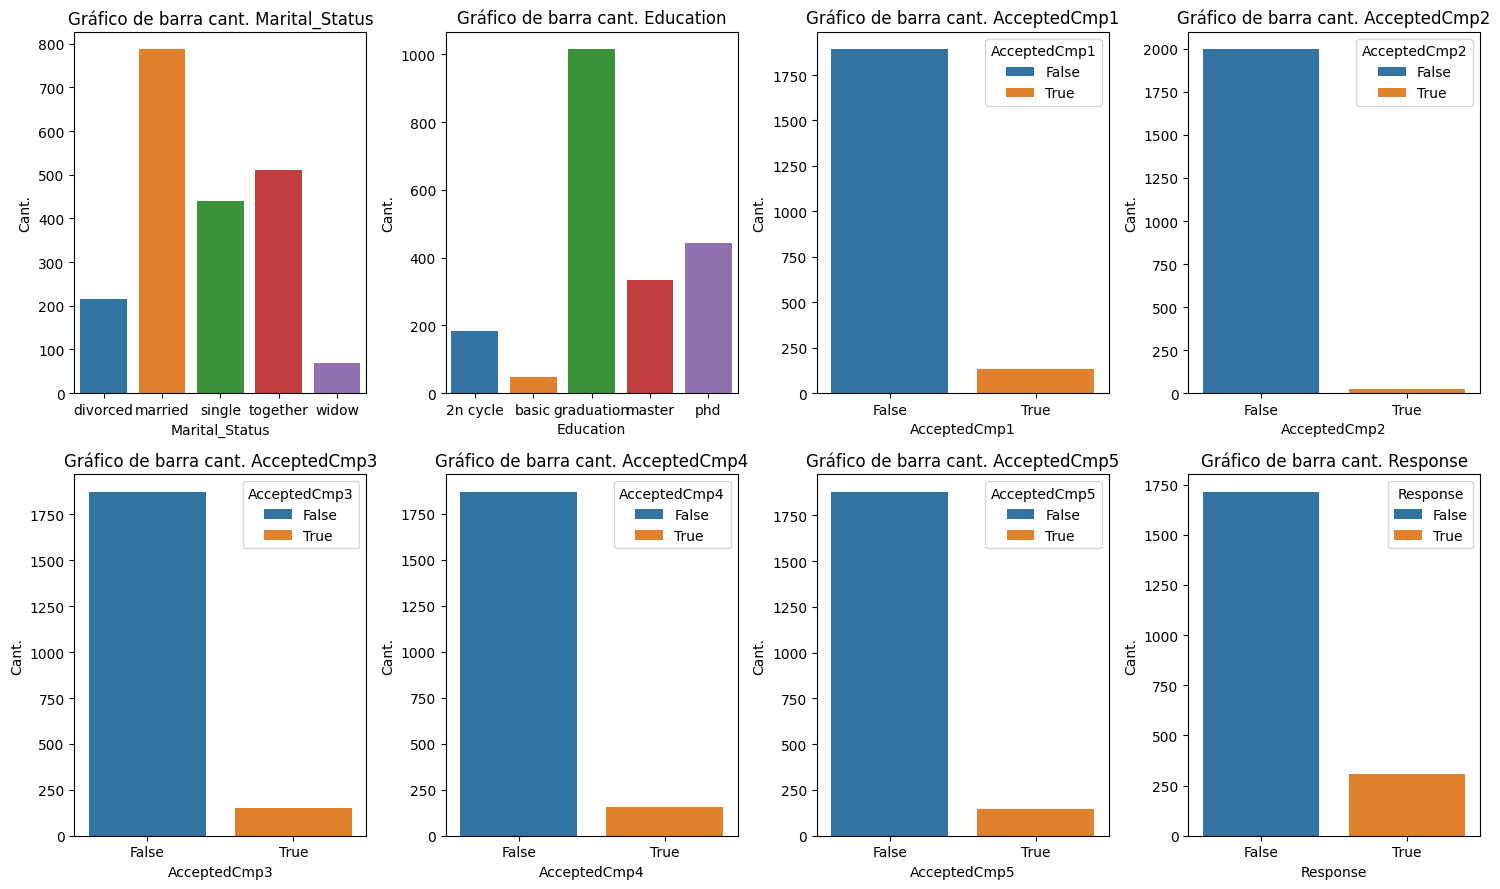

In [48]:
graficar_barras_conteo(
    df, [
        "Marital_Status",
        "Education",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Response",
    ],
    nro_columnas=4,
    figsize=(15, 9),
    savefig_path="../imgs/barras_conteo.png",
)

Podemos notar en los gráficos de barra:

* En el caso de Marital_Status, la gran mayoría de clientes se concentra en las categorías married, single, together, siendo married el que mayor cantidad tiene
* En el caso de Education, se puede visualizar que la mayoría de clientes en el dataset cuenta con educación como mínimo universitaria.
* En la columna objetivo Response, podemos notar que efectivamente existe un gran desbalanceo en los datos, siendo False la respuesta mayoritaria frente a True. Esto se debe tener en cuenta al momento de realizar el modelado.

##### Gráficos de Barra contra Response

/ds_bootcamp/coding-dojo-ds-ml-bootcamp/advanced_machine_learning/examenes/examen_certificacion_intento_2_customer_personality_analysis/notebooks/utils/eda_utils.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,
/ds_bootcamp/coding-dojo-ds-ml-bootcamp/advanced_machine_learning/examenes/examen_certificacion_intento_2_customer_personality_analysis/notebooks/utils/eda_utils.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df.groupby([columna,


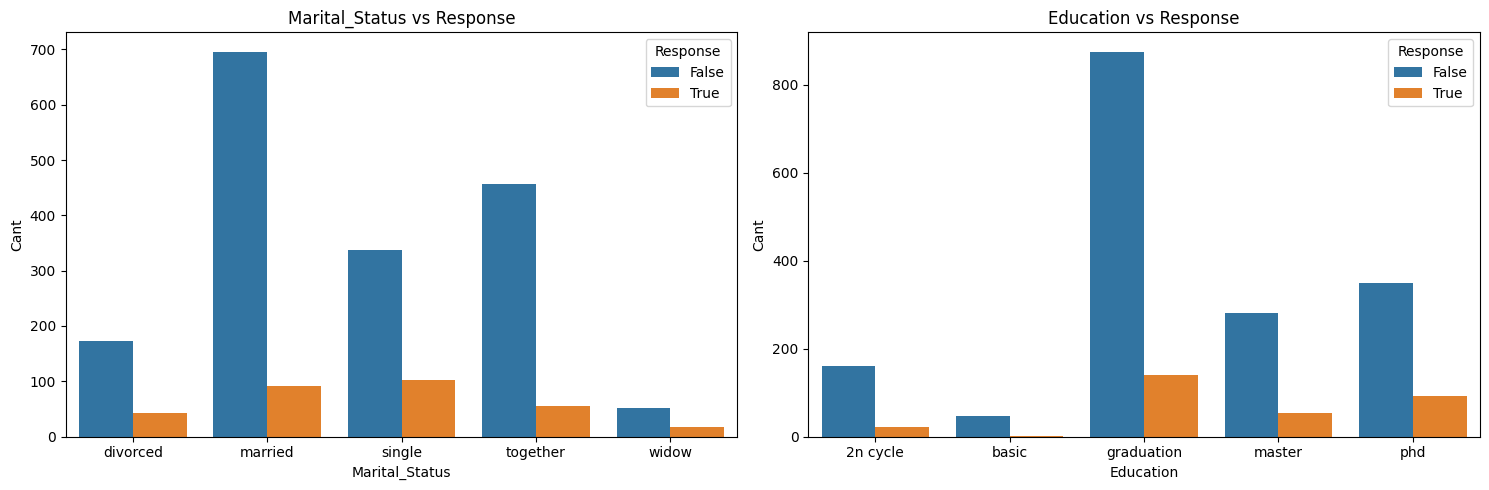

In [49]:
graficar_barras_conteo_contra_columna(
    df,
    ["Marital_Status", "Education"],
    "Response",
    nro_columnas=2,
    figsize=(15, 5),
    savefig_path="../imgs/barras_conteo_contra_response.png",
)

De estos gráficos de barras podemos resaltar:

* La categoría en Marital_Status que más cantidad de respuestas positiva tiene es la single, indicando que las promociones funcionan mejor con esta categoría de clientes.
* También, podemos notar una mayor cantidad de clientes graduados que indican una respuesta positiva a la promoción.
* Finalmente, se visualiza que hay muy pocas respuestas positivas en clientes que no cuentan con educación universitaria. 

#### Mapa de Correlaciones

Mapa de correlación de pearson:

                     Year_Birth    Income   Kidhome  Teenhome   Recency  \
Year_Birth             1.000000 -0.203756  0.249937 -0.363061 -0.015119   
Income                -0.203756  1.000000 -0.521631  0.036645  0.002474   
Kidhome                0.249937 -0.521631  1.000000 -0.049262  0.018256   
Teenhome              -0.363061  0.036645 -0.049262  1.000000  0.021563   
Recency               -0.015119  0.002474  0.018256  0.021563  1.000000   
MntWines              -0.172181  0.679226 -0.504344  0.005269  0.010921   
MntFruits             -0.025336  0.502124 -0.372731 -0.176375 -0.013382   
MntMeatProducts       -0.037103  0.687153 -0.439282 -0.259846  0.012757   
MntFishProducts       -0.045509  0.515318 -0.388210 -0.196056 -0.002682   
MntSweetProducts      -0.026692  0.518388 -0.375703 -0.163242  0.022163   
MntGoldProds          -0.055361  0.374967 -0.350384 -0.013085  0.010701   
NumDealsPurchases     -0.057923 -0.109112  0.208849  0.375269  0.012585   
NumWebPurchases       -0.

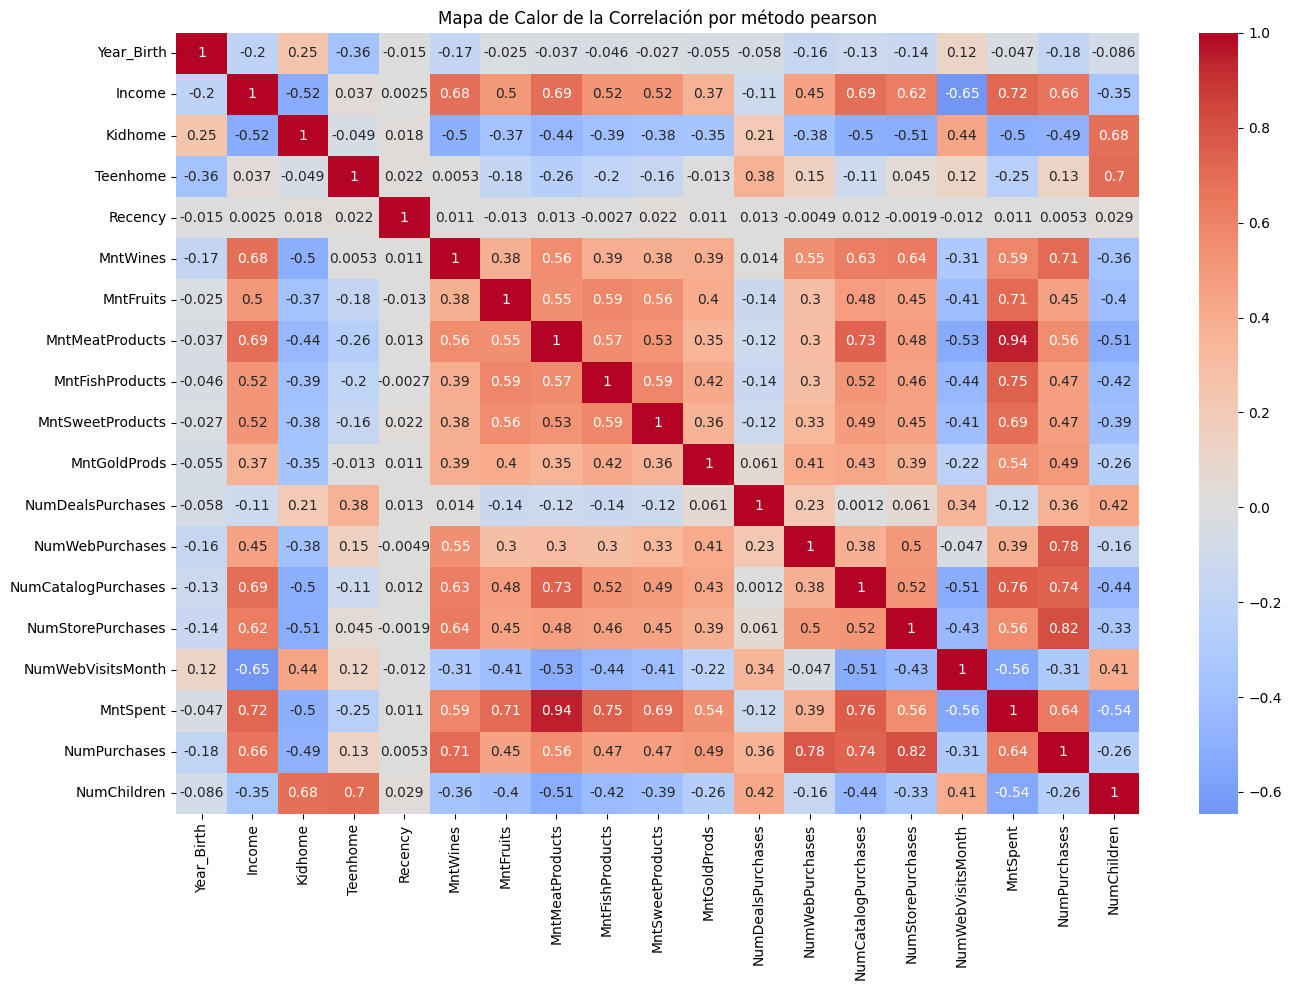

In [50]:
graficar_mapa_correlacion(
    df,
    columnas_numericas,
    savefig_path="../imgs/mapa_correlacion_pearson.png",
)

Del mapa de correlación, podemos notar las siguientes relaciones:

* Columnas como MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, y MntGoldProds, muestran una correlación alta con la columna Income. Esto se interpreta como que los clientes tienen tendencias de gastos acordes a sus ingresos.
* También se puede visualizar una tendencia similar en columnas como NumDealsPurchased, NumWebPurchases, NumCatalogPurchases, NumStorePurchases. La cantidad de compras por parte de clientes está relacionada con sus ingresos.
* También, se detecta una correlación negativa importante entre la columna Income vs la columna Kidhome.
* Se puede visualizar también una correlación negativa en la columna Kidhome vs los campos de cantidad de gasto y cantidad de compras en los diversos tipos de productos. Esto nos indica que la cantidad de hijos impacta en los comportamientos de compra por parte de los clientes.

##### Columna booleana AcceptedCmp1

/tmp/ipykernel_436869/3250082145.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


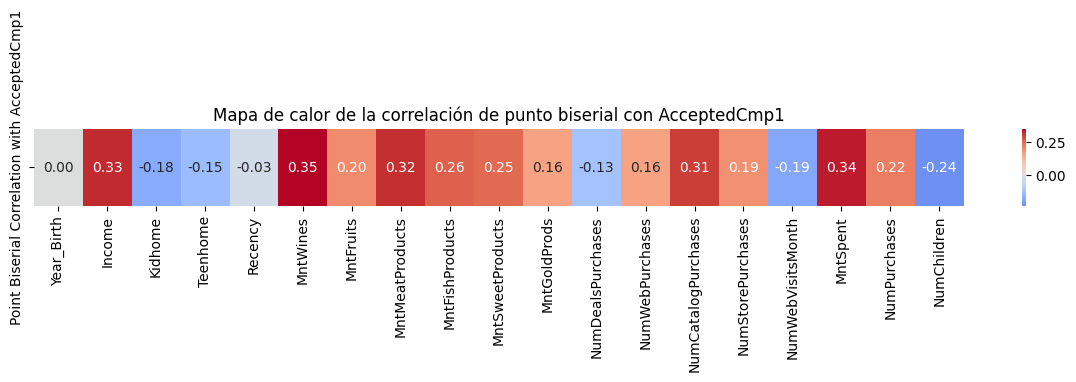

In [51]:
corr = {col: pointbiserialr(df['AcceptedCmp1'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
corr_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Point Biserial Correlation with AcceptedCmp1'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(15, 1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con AcceptedCmp1')

plt.tight_layout()

plt.show()

Podemos notar las siguientes correlaciones con AcceptedCmp1 mayores a 0.1 según el mapa de la correlación de punto biserial:

* Income
* Kidhome
* Teenhome
* MntWines
* MntFruits
* MntMeatProducts
* MntFishProducts
* MntGoldProducts
* NumWePurchases
* NumCatalogPurchases
* NumStorePurchases
* MntSpent
* NumPurchases

De igual manera, estas correlaciones no son muy fuertes.

##### Columna booleana AcceptedCmp2

/tmp/ipykernel_436869/1075326270.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


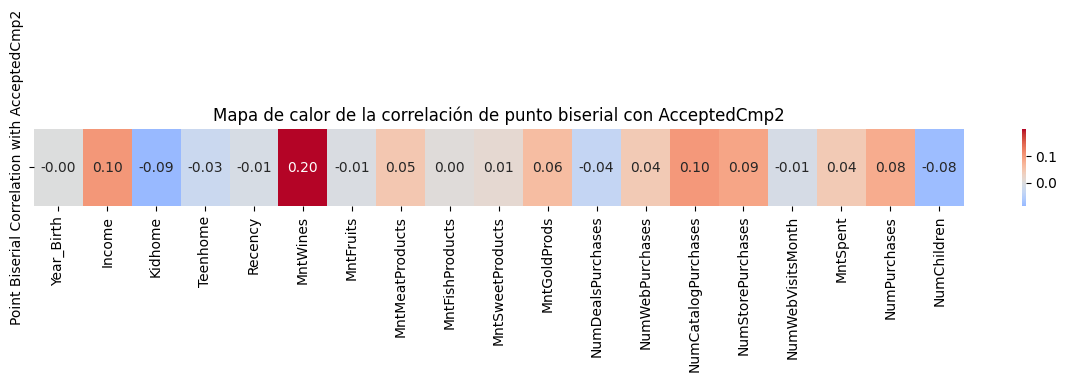

In [52]:
corr = {col: pointbiserialr(df['AcceptedCmp2'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
corr_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Point Biserial Correlation with AcceptedCmp2'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(15, 1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con AcceptedCmp2')

plt.tight_layout()

plt.show()

Notamos las siguientes correlaciones:

* Income
* MntWines
* NumCatalogPurchases

De igual manera, estas correlaciones no son muy fuertes, todas menores a 0.3, muy por debajo del 1.

##### Columna AcceptedCmp3

/tmp/ipykernel_436869/649987575.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


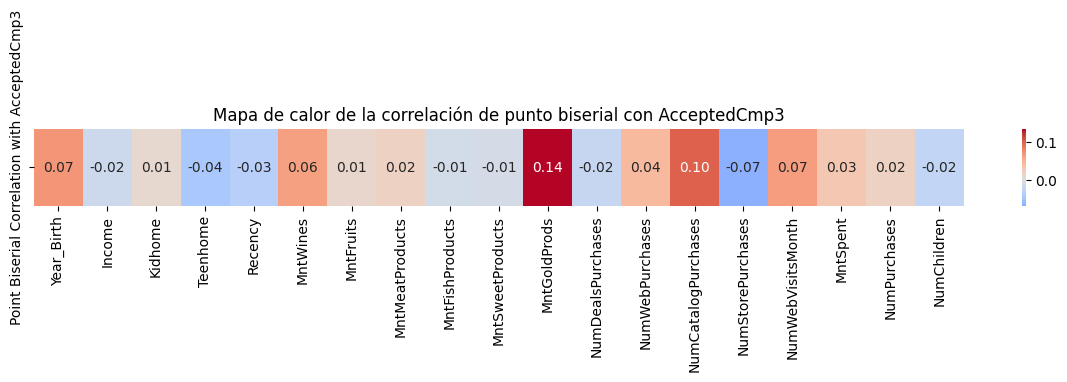

In [53]:
corr = {col: pointbiserialr(df['AcceptedCmp3'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
corr_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Point Biserial Correlation with AcceptedCmp3'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(15, 1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con AcceptedCmp3')

plt.tight_layout()

plt.show()

Notamos las siguientes correlaciones:

* Income
* MntGoldProds
* NumCatalogPurchases

De igual manera, estas correlaciones no son muy fuertes, todas menores a 0.3, muy por debajo del 1.

##### Columna AcceptedCmp4

/tmp/ipykernel_436869/4232053735.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


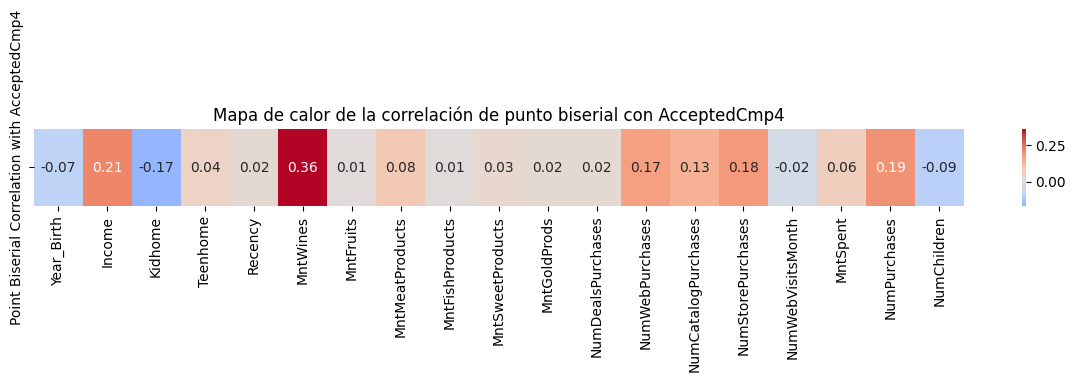

In [54]:
corr = {col: pointbiserialr(df['AcceptedCmp4'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
corr_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Point Biserial Correlation with AcceptedCmp4'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(15, 1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con AcceptedCmp4')

plt.tight_layout()

plt.show()

Notamos las siguientes correlaciones:

* Income
* Kidhome
* MntWines
* NumWebPurchases
* NumCatalogPurchases
* NumStorepurchases

De igual manera, estas correlaciones no son muy fuertes, todas menores a 0.4, muy por debajo del 1.

/tmp/ipykernel_436869/390806579.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


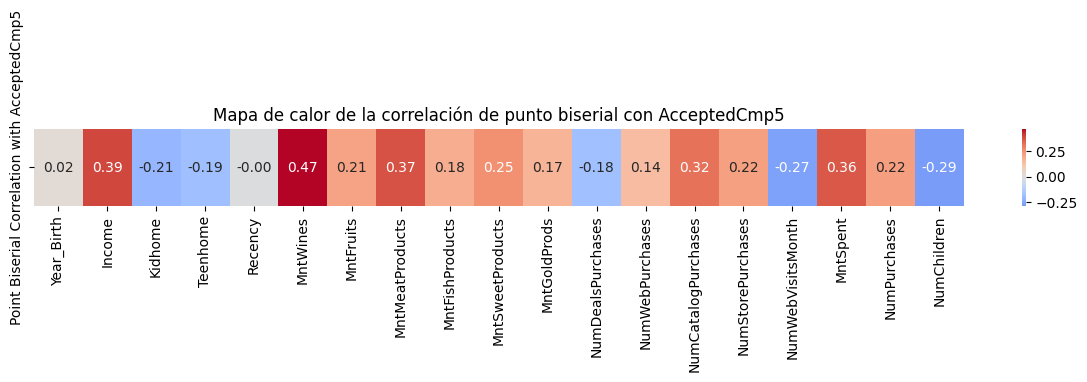

In [55]:
corr = {col: pointbiserialr(df['AcceptedCmp5'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
corr_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Point Biserial Correlation with AcceptedCmp5'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(15, 1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con AcceptedCmp5')

plt.tight_layout()

plt.show()

Notamos las siguientes correlaciones:

* Income
* Kidhome
* Teenhome
* MntWines
* MntFruits
* MntMeatProducts
* MntFishProducts
* MntSweetProducts
* MntGoldProds
* NumDealsPurchases
* NumWebPurchases
* NumCatalogPurchases
* NumStorePurchases
* NumWebVisisMonth

De igual manera, estas correlaciones no son muy fuertes, todas menores a 0.3, muy por debajo del 1.

##### Columna Response

/tmp/ipykernel_436869/3915380228.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


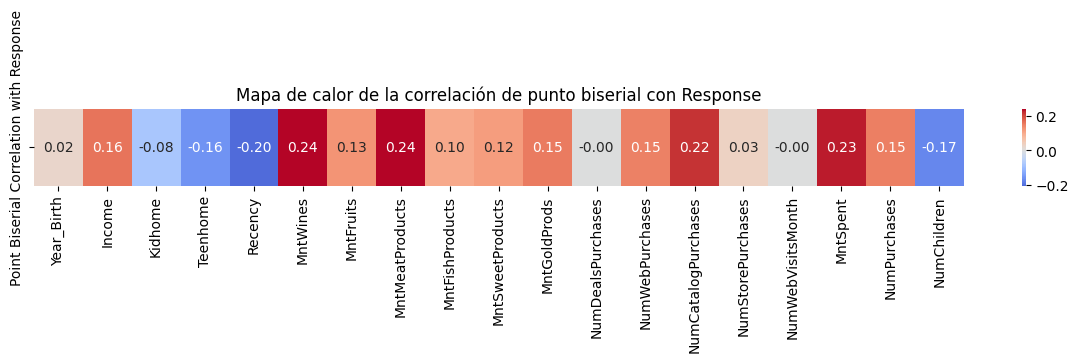

In [56]:
corr = {col: pointbiserialr(df['Response'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
corr_df = pd.DataFrame.from_dict(corr, orient='index', columns=['Point Biserial Correlation with Response'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(15, 1))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con Response')

plt.tight_layout()

plt.savefig("../imgs/mapa_correlacion_response.png")

plt.show()

Podemos notar las siguientes correlaciones con Response mayores a 0.1 según el mapa de la correlación de punto biserial:

* Income
* Teenhome
* Recency
* MntWines
* MntFruits
* MntMeatProducts
* MntFishProducts
* MntGoldProducts
* NumWePurchases
* NumCatalogPurchases

De igual manera, estas correlaciones no son muy fuertes, todas menores a 0.3, muy por debajo del 1.

## 2. Análisis no supervisado:

### Selecciona un enfoque de análisis no supervisado: K-means o PCA.

Para esta sección, se opta por la técnica de clustering KMeans. Se opta por usar todos los datos excepto Response. Si bien, este dataset no parece estar pensado para modelos de aprendizaje supervisados, esta variable se utilizará luego para entrenamiento del modelo a modo de ejemplo de implementación.

#### Preprocesamiento

In [57]:
columnas = df.columns.tolist()
columnas.remove("Response")


Para la técnica de KMeans, nos enfocaremos en las siguientes columnas:

* Income
* MntSpent
* NumPurchases

Se eligieron estas columnas ya que el algoritmo de KMeans usa la distancia como métrica para agrupamiento, y columnas convertidas a través de one-hot o OrdinalEncoder no serían buenas para el agrupamiento a menos que se encuentre una manera muy específica de asignarles un valor numérico.

In [58]:
columnas_numericas = [
    "Income",
    "MntSpent",
    "NumPurchases",
]

columnas_prediccion = columnas_numericas

X = df[columnas_prediccion]

El preprocesamiento para el KMeans se realiza de la sgte. manera:

* Se convierten las columnas sin orden con OneHotEncoder (Marital_Status)
* Se convierten las columnas con orden con OrdinalEncoder (Education)

In [59]:
preprocessor_kmeans = Pipeline(
    steps=[
        ("scaler", RobustScaler()),
    ]
)

In [60]:
X_transf = preprocessor_kmeans.fit_transform(X)

df_transf = pd.DataFrame(X_transf, columns=preprocessor_kmeans.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Income        2025 non-null   float64
 1   MntSpent      2025 non-null   float64
 2   NumPurchases  2025 non-null   float64
dtypes: float64(3)
memory usage: 47.6 KB


Buscamos el mejor K en el rango de 2 a 11 clústeres, usando el método del codo y el Silhouete Score.

Max. Silhouette Score: 0.52


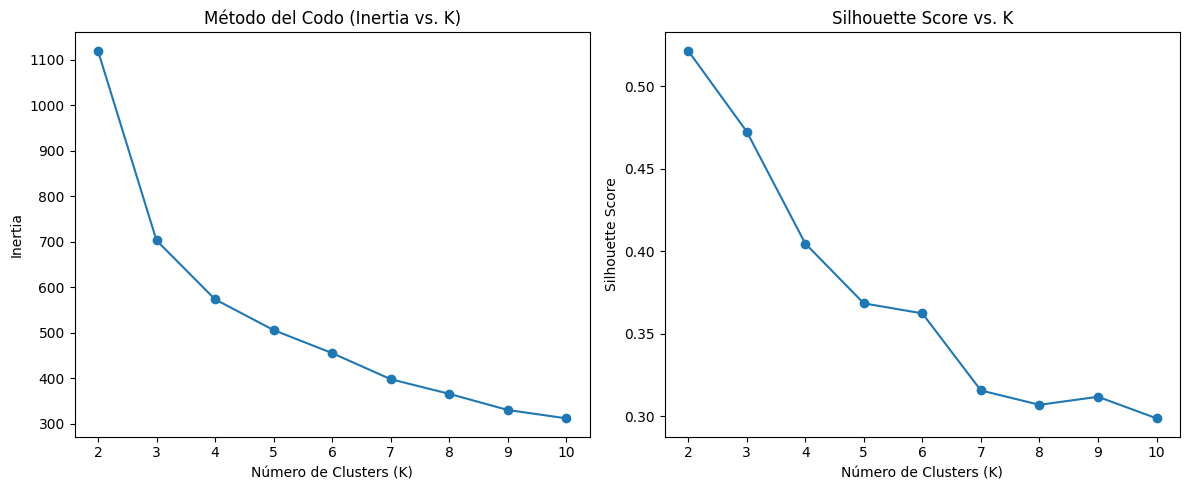

In [61]:
# Calcular Inertia y Silhouette Score para diferentes valores de K
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_transf)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_transf, kmeans.labels_))

print(f"Max. Silhouette Score: {silhouette_scores[np.argmax(silhouette_scores)]:.2f}")

# Crear gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Inertia
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')

# Gráfico de Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()

plt.savefig("../imgs/metodo_codo_silhouete_kmeans.png")

plt.show()

De los gráficos de codo y Silhouete Score, podemos destacar:

* En el gráfico de codo, podemos notar que el nro. de clusters óptimos está en 3.
* En el gráfico de Silhoute score, el máximo valor alcanzado es approx 0.52. No obstante, con este silhouete score solo se crean dos clusters.

De ambos gráficos, podemos determinar que el mejor número de clusters para esta tarea es de 3, ya que el método del codo nos da este valor, y el mejor silhouete score solo nos genera dos grupos, lo cual significaría que los clientes no estarían lo suficientemente bien segmentados.

In [62]:
df_transf.head()

,Income,MntSpent,NumPurchases
0,0.200145,1.895692,0.769231
1,-0.157021,-0.294785,-0.692308
2,0.608219,0.462585,0.461538
3,-0.753551,-0.235828,-0.538462
4,0.204839,0.233560,0.307692


In [63]:
X_transf

array([[ 0.20014536,  1.89569161,  0.76923077],
       [-0.15702129, -0.29478458, -0.69230769],
       [ 0.60821901,  0.46258503,  0.46153846],
       ...,
       [ 0.16510705,  0.42403628,  0.30769231],
       [ 0.53650707,  0.60997732,  0.61538462],
       [ 0.04058024, -0.13151927, -0.30769231]])

De estas comparativas, podemos sacar que el eje X será Income, el eje Y será MntSpent, y el eje Z será NumPurchases

In [64]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_transf)

y_kmeans = kmeans.predict(X_transf)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#### Gráficos en 2D

##### Clústers en columnas Income y MntSpent

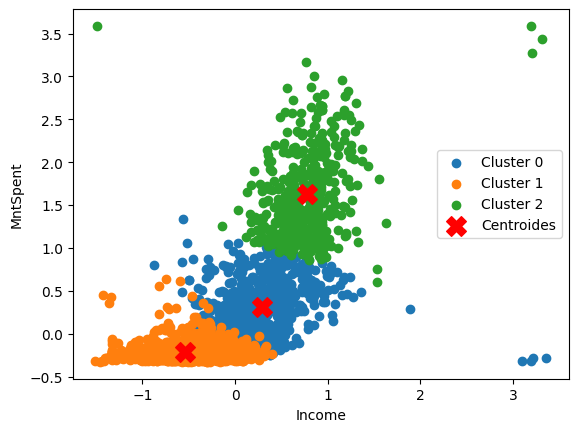

In [65]:
for cluster in np.unique(labels):
    cluster_points = X_transf[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("Income")
plt.ylabel("MntSpent")
plt.legend()
plt.savefig("../imgs/clusters_kmeans_income_mnt_spent.png")
plt.show()

En este gráfico podemos ver los tres clústers generados por KMeans. Se puede resaltar lo siguiente:

* El primer grupo, en color verde, es el grupo en el que los ingresos son los más bajos.
* En el segundo grupo, podemos notar que incrementan los ingresos, y también la cant. gastada incrementa
* En el tercer grupo, notamos otro incremento en los rangos de ingresos, aunque la cantidad gastada incrementa mucho más rápidamente que los ingresos.
* Podemos visualizar que los grupos se van dividiendo más de acuerdo a la cantidad gastada antes que los ingresos.

##### Clústers en columnas Income y NumPurchases

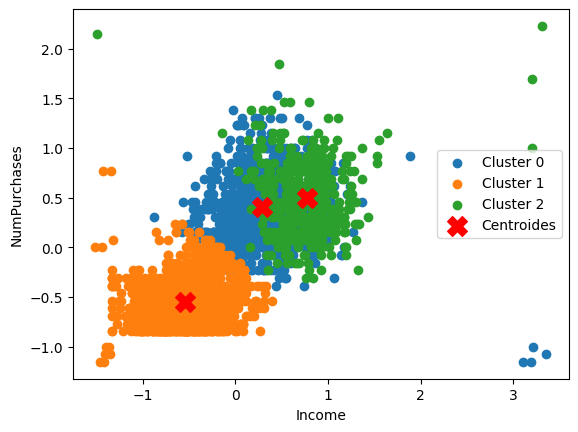

In [66]:
for cluster in np.unique(labels):
    cluster_points = X_transf[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 2], label=f'Cluster {cluster}')

plt.scatter(centroids[:, 0], centroids[:, 2], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("Income")
plt.ylabel("NumPurchases")
plt.legend()
plt.savefig("../imgs/clusters_kmeans_income_num_purchases.png")
plt.show()

En este gráfico de dispersión, podemos ver lo siguiente:

* El Cluster 1 es el que aglomera los clientes con menor cant. de ingresos.
* Se puede visualizar en los gráficos, que el clúster 1 está bien separado de los otros 2, pero los clústers 0 y 2 están bastante cerca, lo que lleva a concluír que en estos ejes hay un poco de solapamiento, a diferencia de en el gráfico anterior.

##### Clústers en columnas NumPurchases y MntSpent

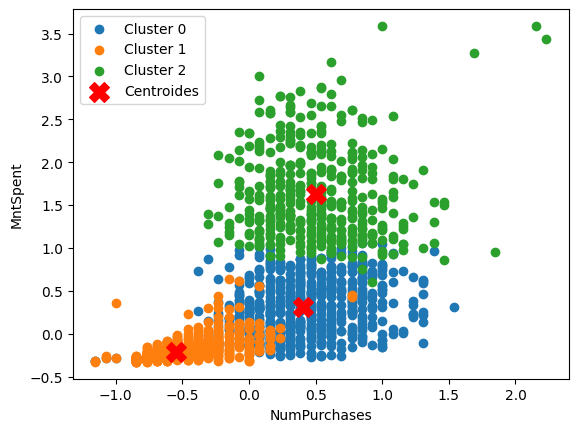

In [67]:
for cluster in np.unique(labels):
    cluster_points = X_transf[labels == cluster]
    plt.scatter(cluster_points[:, 2], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.scatter(centroids[:, 2], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel("NumPurchases")
plt.ylabel("MntSpent")
plt.legend()
plt.savefig("../imgs/clusters_kmeans_num_purchases_mnt_spent.png")
plt.show()

En este gráfico de dispersión podemos notar lo siguiente:
* Los tres clústers están bien separados.
* En el cluster 1, podemos notar como incrementa el gasto conforme incrementa el número de compras.
* En el cluster 0, podemos notar que la cantidad gastada también incrementa el número de compras, aunque hay una mayor dispersión en este caso, y la cantidad gastada crece mas rápido que el número de compras.
* En el cluster 2, podemos notar que hay una mayor cantidad de gasto, pero el rango de cantidad de compras se mantiene similar al del cluster 0.

#### Gráfico en 3D

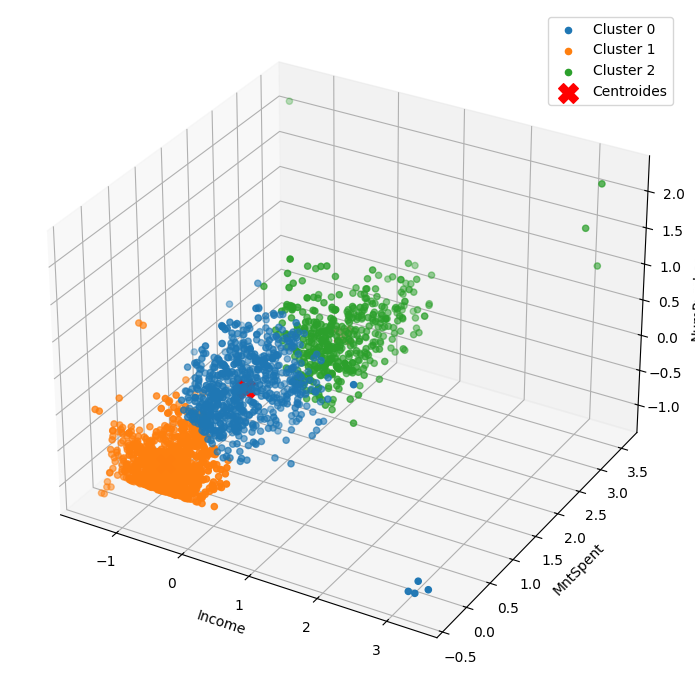

Silhouette Score: 0.47
Calinski Harabasz score: 2968.11
Davies-Bouldin Index: 0.8130118807868767


In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


for cluster in np.unique(labels):
    cluster_points = X_transf[labels == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label='Centroides')
ax.set_xlabel('Income')
ax.set_ylabel('MntSpent')
ax.set_zlabel('NumPurchases')
ax.legend()
plt.tight_layout()
plt.savefig("../imgs/clusters_kmeans_3d.png")
plt.show()

# Calcular métrica de Silhouette
silhouette_avg = silhouette_score(X_transf, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")

De los gráficos 3D y las otras gráficas podemos notar:

* Se forman los tres clusters, que en este caso parecen estar bien agrupados.
* Podemos notar que a medida que incrementan los ingresos, también incrementa la cantidad gastada.
* El cluster 1 está bien separado del resto en todos los ejes.
* Los clusters 0 y 2 están solapados en el eje de Income, pero se puede verificar la separación en el eje de la cantidad gastada, en la que a medida que incrementa la cantidad gastada también incrementa.

De todos los resultados, podemos concluír lo siguiente:

* La mejor K para estos datos es de K=3.
* El Silhouete Score para K=3 es de 0.47, no muy alto pero nos indica que existe un clustering.
* Con esta K, se crean 3 grupos:
    * Cluster 1: El grupo de clientes que tiene menores ingresos y gasta menos.
    * Cluster 0: El grupo de clientes que gana más pero no necesariamente gasta mucho más.
    * Cluster 2: El grupo de clientes que gana más y también gasta más. Adicionalmente, estos clientes tienden a gastar más en productos particulares en vez de hacer muchas compras.
* Estos grupos nos indican que efectivamente el agrupamiento es efectivo en detectar grupos de clientes que hacen sentido de negocio, y por lo cual, es una técnica válida para este problema.

## 3. Modelado con MLP:

Para esta sección, se opta por buscar si es que un cliente aceptará una oferta en una campaña publicitaria. Esto se decidió debido a que no existe un campo que indique el tipo de producto vendido en el dataset. Con este acercamiento, se pretende dar una idea a la compañía de si la persona responderá positivamente a cierta campaña publicitaria, en base a sus datos y el aceptamiento de campañas previas.

Adicionalmente, se consideró también la posibilidad de realizar un feature engineering para agregar el tipo de producto que más probablemente compre el cliente, o utilizar los resultados de KMeans, para crear features relacionadas a productos a ser predichas, pero finalmente se optó por no implementar este tipo de feature engineering para variables objetivo. Esto se debe a que por lo general el feature engineering se basa en asumpciones en los datos que pueden llevar a correlaciones, lineales o no. Estas correlaciones serían fácilmente detectadas por los modelos de predicción, por lo que al final se estaría prediciendo un feature que ya tiene una relación con otras características, llevando a un rendimiento potencialmente alto.

### Preprocesamiento de columnas.

In [69]:
df.columns.tolist()

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'MntSpent',
 'NumPurchases',
 'NumChildren']

Para el preprocesamiento, se tiene en cuenta lo siguiente:

* Se deben convertir las columnas booleanas a numéricas, para que tensorflow pueda trabajar con estos datos.
* Se deben convertir las columnas categóricas usando o OneHotEncoder o OrdinalEncoder, dependiendo de si estas variables categóricas poseen un orden o no.
* Se deben escalar las columnas numéricas, para mejorar el rendimiento del modelo MLP, incrementar la velocidad de convergencia, y mantener la estabilidad durante el entrenamiento.

In [70]:
def _booleano_a_nro(x):
    return 1.0 if x else 0.0

df_mlp = df.copy()

columnas_boleanas = df_mlp.select_dtypes("bool").columns.tolist()

for columna in columnas_boleanas:
    df_mlp[columna] = df_mlp[columna].apply(_booleano_a_nro)


df_mlp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Year_Birth           2025 non-null   int64              
 1   Education            2025 non-null   category           
 2   Marital_Status       2025 non-null   category           
 3   Income               2025 non-null   float64            
 4   Kidhome              2025 non-null   int64              
 5   Teenhome             2025 non-null   int64              
 6   Dt_Customer          2025 non-null   datetime64[ns, UTC]
 7   Recency              2025 non-null   int64              
 8   MntWines             2025 non-null   int64              
 9   MntFruits            2025 non-null   int64              
 10  MntMeatProducts      2025 non-null   int64              
 11  MntFishProducts      2025 non-null   int64              
 12  MntSweetProducts     2025

In [71]:
columnas_numericas = [
    "Year_Birth",
    "Income",
    "NumChildren",
    "Recency",
    "MntSpent",
    "NumPurchases",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "NumWebVisitsMonth",
]

columnas_ordinales = [
    "Education",
]

columnas_onehot = [
    "Marital_Status",
]

columnas_prediccion = columnas_numericas + columnas_ordinales + columnas_onehot

X = df_mlp[columnas_prediccion]
y = df_mlp["Response"]

In [72]:
X.shape

(2025, 14)

In [73]:
df_mlp["Education"].unique().tolist()

['graduation', 'phd', 'master', 'basic', '2n cycle']

Creamos el preprocesador.

In [74]:
print(columnas_ordinales)
print(columnas_onehot)
print(columnas_numericas)

['Education']
['Marital_Status']
['Year_Birth', 'Income', 'NumChildren', 'Recency', 'MntSpent', 'NumPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'NumWebVisitsMonth']


In [75]:
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", OrdinalEncoder(categories=[["basic", "2n cycle", "graduation", "master", "phd"]]), columnas_ordinales),
        ("onehot", OneHotEncoder(), columnas_onehot),
        ("scaler", RobustScaler(), columnas_numericas),
    ],
    remainder="passthrough"
)

Verificamos que la transformación se realice correctamente.

In [76]:
X.columns.tolist()

['Year_Birth',
 'Income',
 'NumChildren',
 'Recency',
 'MntSpent',
 'NumPurchases',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'NumWebVisitsMonth',
 'Education',
 'Marital_Status']

In [77]:
X_transf = preprocessor.fit_transform(X)


df_transf = pd.DataFrame(X_transf, columns=preprocessor.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ordinal__Education               2025 non-null   float64
 1   onehot__Marital_Status_divorced  2025 non-null   float64
 2   onehot__Marital_Status_married   2025 non-null   float64
 3   onehot__Marital_Status_single    2025 non-null   float64
 4   onehot__Marital_Status_together  2025 non-null   float64
 5   onehot__Marital_Status_widow     2025 non-null   float64
 6   scaler__Year_Birth               2025 non-null   float64
 7   scaler__Income                   2025 non-null   float64
 8   scaler__NumChildren              2025 non-null   float64
 9   scaler__Recency                  2025 non-null   float64
 10  scaler__MntSpent                 2025 non-null   float64
 11  scaler__NumPurchases             2025 non-null   float64
 12  scaler__AcceptedCmp1

In [78]:
X_transf.shape

(2025, 18)

### Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.

### Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

Se realizarán los dos ítems solicitados en un mismo paso.

Creamos el Modelo Perceptrón Multicapa (MLP) con las siguientes consideraciones:

* Se necesitarán 18 entradas, que provendrán de la salida del preprocesador.
* Se necesitará 1 salida, la probabilidad de aceptación o no.
* Se agregarán dos capas a la red neuronal, una de 64 entradas y otra de 32, las dos con activación de tipo relu para introducir no linealidad al modelo.
* Se agregará un dropout a la salida de cada capa con el objetivo de evitar overfitting.
* Se usará binary_crossentropy como función de pérdida para el modelo. Esta función de pérdida es usada específicamente para modelos de clasificación binarias.
* Se usará accuracy como métrica principal, con el objetivo de predecir correctamente la mayor cantidad de muestras correctamente.
* Se usara Adam como optimizador para la búsqueda de los mínimos.
* Se seleccionará learning_rate como 0.001 para. Este valor debe ser bajo para alcanzar un buen mínimo con el optimizador.
* Se seleccionará un batch_size de 16 para empezar. En caso de que el rendimiento sea bajo, se puede optar por incrementar este parámetro, teniendo en cuenta que también se deberá ajustar learning_rate en el optimizador Adam.
* Se configurarán 50 épocas para el entrenamiento del MLP.
* Se utilizará la técnica de early stopping para detectar cuando la pérdida de validación ya no baja, disminuyendo la posibilidad de overfitting.

In [79]:
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_dim=X_transf.shape[1]),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


model = create_model()
model.summary()

/home/diego/.virtualenvs/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1734833683.471040  436869 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2449 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)

A continuación, se implementa una integración entre Keras y Sklearn para facilitar el uso de pipelines. La implementación se basó en este [ejemplo](https://www.geeksforgeeks.org/can-we-use-scikit-learn-and-tensorflow-together/).

In [80]:
class MLPTfClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model, epochs=1, batch_size=32, verbose=0, validation_split=None, callbacks=None):
        # Copiamos como atributos los parámetros que usaríamos para entrenar
        # el modelo con tensorflow normalmente.
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = model
        self.validation_split = validation_split
        self.callbacks = callbacks
        # Marcamos model como None para tener compatibilidad con IPython.
        self.model = None

    def fit(self, X, y):
        self.model_.fit(
            X,
            y,
            epochs=self.epochs,
            batch_size=self.batch_size,
            verbose=self.verbose,
            validation_split=self.validation_split,
            callbacks=self.callbacks,
        )
        return self

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.predict(X)

    def predict(self, X):
        predictions = []

        predictions_tf = self.model_.predict(X)
    
        for row in predictions_tf:
            predictions.append(bool(row[0] > 0.5))
        return predictions

    def predict_proba(self, X):
        return self.model_.predict(X)

    def score(self, X, y):
        _, accuracy = self.model_.evaluate(X, y, verbose=self.verbose)
        return accuracy

Adicionalmente, para el modelo definido, implementaremos la técnica de early_stopping para evitar que la red neuronal se sobre entrene.

In [81]:
# Definir el callback de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = History()

# Create a Scikit-learn pipeline
mlp = Pipeline([
    # Implementamos el PCA de acuerdo a las decisiones tomadas.
    ('preprocessor', preprocessor),
    ('model', MLPTfClassifier(
        model=model,
        epochs=50,
        batch_size=16,
        verbose=1,
        validation_split=0.2,
        callbacks=[history, early_stopping]
    ))
])

### Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Entrenamiento del modelo.

In [83]:
mlp.fit(X_train, y_train)

Epoch 1/50


I0000 00:00:1734833686.081210  437202 service.cc:148] XLA service 0x71753400a3e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734833686.081253  437202 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2024-12-22 02:14:46.120262: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734833686.328450  437202 cuda_dnn.cc:529] Loaded cuDNN version 90300


55/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7939 - loss: 0.5525

I0000 00:00:1734833688.111320  437202 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.8015 - loss: 0.5388 - val_accuracy: 0.8310 - val_loss: 0.4403
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8464 - loss: 0.3946 - val_accuracy: 0.8380 - val_loss: 0.3826
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8709 - loss: 0.3439 - val_accuracy: 0.8768 - val_loss: 0.3317
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8783 - loss: 0.3081 - val_accuracy: 0.8768 - val_loss: 0.3103
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8875 - loss: 0.3011 - val_accuracy: 0.8873 - val_loss: 0.3024
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8977 - loss: 0.2824 - val_accuracy: 0.8838 - val_loss: 0.2958
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8947 - loss: 0.2800 - val_accuracy: 0.8838 - val_loss: 0.2979
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8985 - loss: 0.2666 - val_accuracy: 0.8873 - val_loss: 0.2874
Ep

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['basic',
                                                                              '2n '
                                                                              'cycle',
                                                                              'graduation',
                                                                              'master',
                                                                              'phd']]),
                                                  ['Education']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Marital_Status']),
                                                 ('scaler', RobustScaler(),
                                                  ['Year_Birth', 'Income',
                                                   'NumChildren', 'Recency',
                                                   'MntSpent', 'NumPurchases',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5',
                                                   'NumWebVisitsMonth'])])),
                ('model',
                 MLPTfClassifier(batch_size=16,
                                 callbacks=[<keras.src.callbacks.history.History object at 0x7175f06e67d0>,
                                            <keras.src.callbacks.early_stopping.EarlyStopping object at 0x7175f06e66b0>],
                                 epochs=50, model=None, validation_split=0.2,
                                 verbose=1))])

## 4. Evaluación del modelo:

### Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

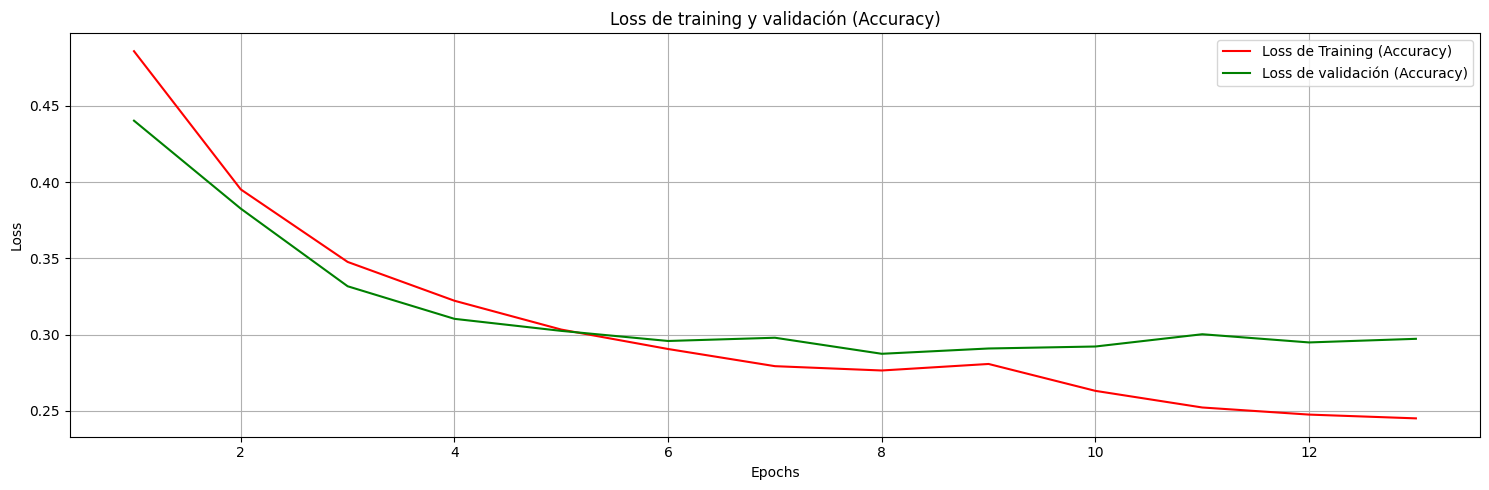

In [84]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

epochs = [i+1 for i in range(len(tr_loss))]

# Gráfico
plt.figure(figsize= (15, 5))

plt.plot(epochs, tr_loss, 'r', label= 'Loss de Training (Accuracy)')
plt.plot(epochs, val_loss, 'g', label= 'Loss de validación (Accuracy)')
plt.title('Loss de training y validación (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.grid()

plt.tight_layout()

plt.savefig("../imgs/mlp_loss_training_validacion.png")

plt.show()

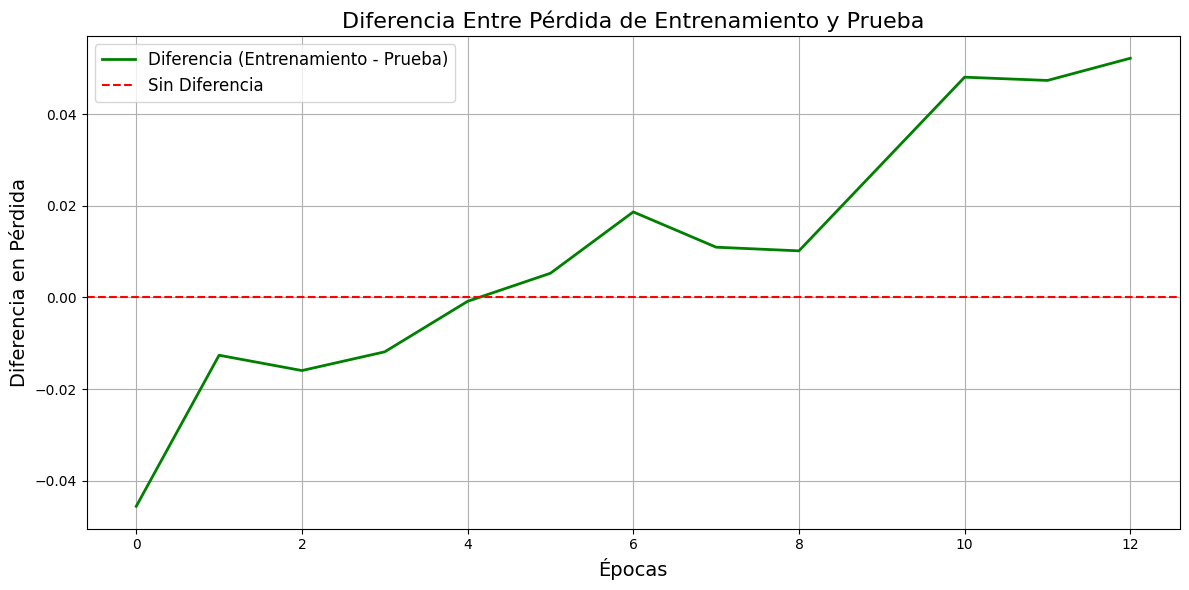

In [85]:
# Diferencia entre las pérdidas
loss_difference = np.array(history.history['val_loss']) - np.array(history.history['loss'])

plt.figure(figsize=(12, 6))
plt.plot(loss_difference, label="Diferencia (Entrenamiento - Prueba)", color="green", linewidth=2)
plt.axhline(0, color="red", linestyle="--", label="Sin Diferencia")
plt.title("Diferencia Entre Pérdida de Entrenamiento y Prueba", fontsize=16)
plt.xlabel("Épocas", fontsize=14)
plt.ylabel("Diferencia en Pérdida", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

plt.tight_layout()

plt.savefig("../imgs/mlp_loss_training_validacion_diferencia.png")

plt.show()

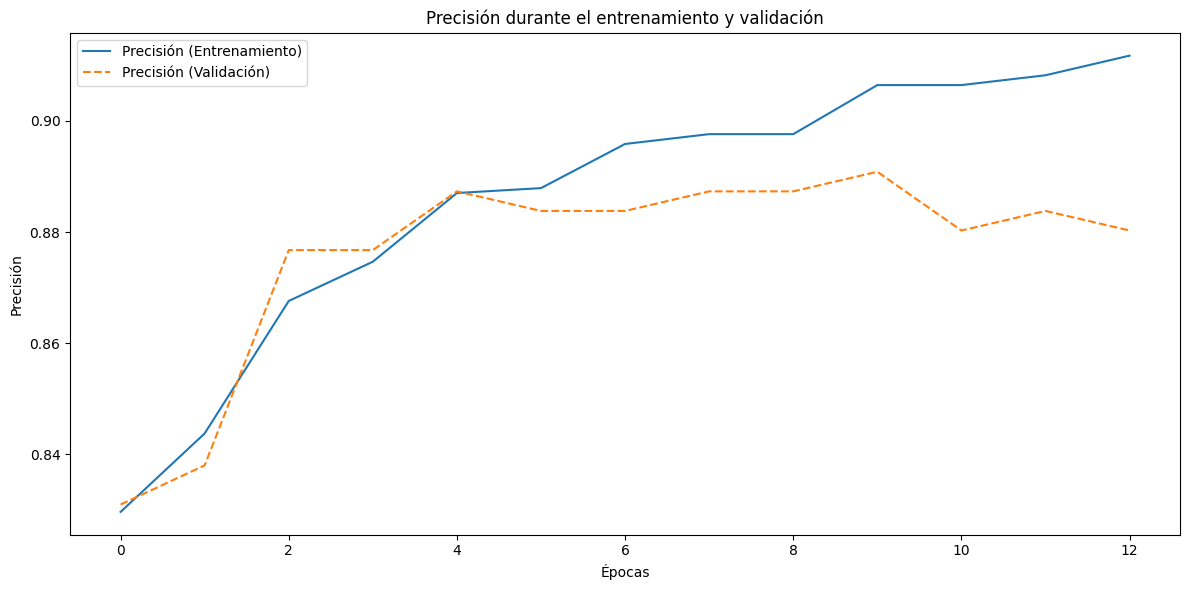

In [86]:
plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label=f"Precisión (Entrenamiento)")
plt.plot(history.history['val_accuracy'], linestyle='--', label=f"Precisión (Validación)")

plt.title("Precisión durante el entrenamiento y validación")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

plt.tight_layout()

plt.savefig("../imgs/mlp_precision_validacion.png")

plt.show()

De estos gráficos de pérdida en training y validación podemos destacar:

* Inicialmente se puede visualizar una pérdida bastante alta en el accuracy, pero que va reduciéndose a medida que pasan más épocas de entrenamiento
* En el caso de la pérdida de validación, se puede notar que se mantiene relativamente consistente con la pérdida de entrenamiento hasta la época 5 aproximadamente
* Las diferencias entre entrenamiento y perdida son bastante bajas, oscilando entre -0.05 y 0.05, lo que reduce la posibilidad de que el modelo presente overfitting.
* La época en la que la precisión empieza a mantenerse estable es la 4. Mas allá de esto, existe mejora de precision en training pero ya no en validación.
* Se puede visualizar que el EarlyStopping detuvo el entrenamiento previo a llegar a las 50 épocas, detectando que ya no había mejoras significativas en la pérdida de validación a partir de la época 5 aproximadamente.

### Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.

In [87]:
y_pred_mlp = mlp.predict(X_test)
y_pred_proba_mlp = mlp.predict_proba(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [88]:
y_pred_mlp

[True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,


In [89]:
y_pred_proba_mlp

array([[8.04322839e-01],
       [1.48882657e-01],
       [1.77909788e-02],
       [7.93788210e-02],
       [2.44027600e-01],
       [2.12327484e-02],
       [5.61698139e-01],
       [1.45187648e-02],
       [7.03911204e-03],
       [2.34621353e-02],
       [9.78588592e-03],
       [1.60608478e-02],
       [1.60708576e-02],
       [4.87625152e-02],
       [3.72785442e-02],
       [3.66001986e-02],
       [7.28110373e-02],
       [1.81553662e-02],
       [9.45195630e-02],
       [4.34975743e-01],
       [2.12575793e-01],
       [5.92255406e-03],
       [3.85014713e-01],
       [8.17995612e-03],
       [4.47679937e-01],
       [3.47112983e-01],
       [6.57017156e-02],
       [3.77994701e-02],
       [3.62365879e-02],
       [2.03534216e-02],
       [8.36654127e-01],
       [1.01547558e-02],
       [1.99780967e-02],
       [1.23228319e-02],
       [6.12666784e-03],
       [9.29259717e-01],
       [1.44305145e-02],
       [4.19569463e-02],
       [3.89472753e-01],
       [2.95798071e-02],


In [90]:
accuracy = accuracy_score(y_test, y_pred_mlp)
precision = precision_score(y_test, y_pred_mlp)
recall = recall_score(y_test, y_pred_mlp)
f1 = f1_score(y_test, y_pred_mlp)
roc_auc = roc_auc_score(y_test, y_pred_proba_mlp)

In [91]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.87
Precision: 0.53
Recall: 0.41
F1: 0.46
ROC AUC: 0.85


In [92]:
reporte = classification_report(y_test, y_pred_mlp)
print(reporte)

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       527
         1.0       0.53      0.41      0.46        81

    accuracy                           0.87       608
   macro avg       0.72      0.68      0.69       608
weighted avg       0.86      0.87      0.87       608



In [93]:
matriz_confusion = confusion_matrix(y_test, y_pred_mlp)
print(matriz_confusion)

[[498  29]
 [ 48  33]]


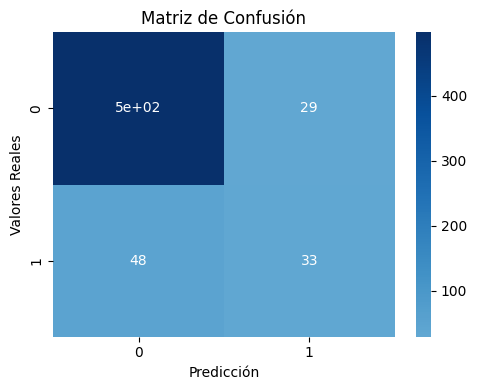

In [94]:
graficar_matriz_confusion(matriz_confusion, figsize=(5, 4), savefig_path="../imgs/mlp_matriz_confusion.png")

Graficamos la curva ROC AUC

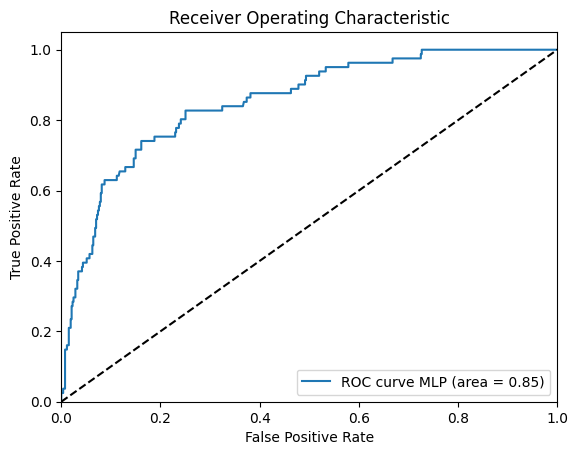

In [95]:
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_proba_mlp)


# Plotear la curva ROC
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label='ROC curve MLP (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig("../imgs/mlp_curva_roc_auc.png")

plt.show()

Según los resultados obtenidos de las métricas, reporte de clasificación, matriz de confusión, y curvas ROC AUC, podemos concluír:

* En accuracy, se obtiene un resultado de 0.87. Un resultado medianamente alto, aunque con algunos errores.
* En precision, se obtiene un resultado de 0.53, lo que nos indica que el está reportando muchos falsos positivos.
* En recall, se obtiene un resultado de 0.41, valor bastante bajo, lo que indica que el modelo MLP reporta una alta cantidad de falsos negativos.
* En f1 score, se obtiene un resultado de 0.46. Un valor bastante bajo, lo que indica que el balance entre precision y recall tampoco es tan bueno.
* La curva ROC AUC indica que si bien el rendimiento del modelo es bueno, la curva no se acerca tanto hacia el límite superior e izquierdo, por lo que el rendimiento del modelo en esta métrica es bueno pero podría mejorar. El area es 0.85, un valor alto pero que puede mejorar.
* El reporte de clasificación nos indica, que el modelo tiene muy buen rendimiento para valores negativos. No obstante, el performance no es tan bueno para la clase positiva, con valores en accuracy, precision, recall, y f1 muy bajos.
* En la matriz de confusión, podemos ver que existe una mayor cantidad de positivos clasificados como negativos, en comparación a los positivos clasificados correctamente. También, se puede ver como el modelo predice muy bien los negativos, con pocos falsos positivos predichos.
* Estos resultados nos indican que muy posiblemente el desbalanceo visto en los gráficos de barra en Response afecta al entrenamiento del modelo, teniendo un mejor rendimiento predijendo la clase mayoritaria (False) vs la clase minoritaria (True).

Teniendo en cuenta los resultados, el modelo tiene problemas para la detección de valores positivos, pero es bueno detectando respuestas negativas, lo cual sería de mucha ayuda a la empresa, evitando gastar en la promoción para clientes que definitivamente no comprarán. Por este motivo, el modelo es una buena alternativa, siempre y cuando se quiera reducir la cantidad de promociones a clientes que potencialmente no estén interesados.

## 5. Discusión y análisis:

### Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?

En el análsis con KMeans, notamos que efectivamente se crearon grupos o clusteres que incluyen:

* Cluster 1: El grupo de clientes que tiene menores ingresos y gasta menos.
* Cluster 0: El grupo de clientes que gana más pero no necesariamente gasta mucho más.
* Cluster 2: El grupo de clientes que gana más y también gasta más. Adicionalmente, estos clientes tienden a gastar más en productos particulares en vez de hacer muchas compras.

Estos clusteres son de mucha importancia para la empresa, ya que le permitirá identificar comportamientos de gasto y de cantidad de compras similares en clientes, y por ende podrá tomar mejores decisiones al momento de extender ofertas.

### Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

En este caso, el modelo MLP es bueno para la detección de respuestas negativas a ofertas por parte de clientes. No tanto para predecir si un cliente va a cerrar la compra o no, ya que el performance es malo para predecir respuestas positivas.

Esto no significa que el modelo sea necesariamente malo, ya que será muy útil a la empresa para evitar realizar ofertas que definitivamente no serán tomadas por los clientes, lo cual resulta en un ahorro potencial en publicidad para sus promociones, solamente tratando de acercarse a clientes que si bien no se sabe si aceptarán la oferta, al menos no es definitivo que no la van a aceptar.

El rendimiento del modelo puede mejorar potencialmente utilizando técnicas de tipo oversampling para incrementar muestras de la clase minoritaria, que en este caso sería True. En caso de ser implementado, también se debe asegurar que el modelo no presente overfitting, ya que esta técnica consiste en incrementar las cantidades de muestras, lo que puede llevar a sesgos inesperados. Para esto, se pueden utilizar métodos como la validación cruzada, asegurándose de que el modelo responda bien en diversas partes del conjunto de datos de entrnamiento.

Adicionalmente, se deja entrenado el modelo predictivo de Ingresos para imputaciones de esta columna en producción, para los casos en el que el cliente no reporte sus ingresos por algún motivo.

## 6. Entrega final:

### Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.

* Reporte en Markdown: [reporte_examen.md](../reportes/reporte_examen.md)
* Reporte en PDF: [reporte_examen.pdf](../reportes/reporte_examen.pdf)